Nom : Asmi

Prénom : Firas

Email : firas.asmi@essai.ucar.tn

# Web Scraping des Données Météorologiques en Tunisie avec rvest

Dans ce projet, nous allons effectuer du web scraping pour extraire des données météorologiques de plusieurs villes de Tunisie à partir du site world-weather.info. Pour ce faire, nous utiliserons le paquet `rvest` en R, qui est spécialement conçu pour faciliter le web scraping. Une fois les données extraites, nous procéderons au nettoyage et à la structuration de la base de données afin de les rendre exploitables pour des analyses ultérieures.

Nous commencerons par installer le paquet nécessaire, puis nous passerons à l'extraction des données et enfin au nettoyage de celles-ci. Ensuite, nous utiliserons la base de données pour extraire des insights de données et créer un modèle pour prédire les changements de températures.

![Uploading e60d56ff-b212-4cfa-8475-f1756b3a44bc.jpg]()
!html

## Installation et Importation des Paquets

Dans cette section, nous allons installer et importer les paquets nécessaires pour notre projet de web scraping. Nous utiliserons principalement sept bibliothèques : `rvest`, `dplyr`, `ggplot2`, `readr`, `tidyr`, `reshape` et `cluster`.

- **rvest** : Ce paquet est conçu pour simplifier le processus de web scraping en R. Il permet d'extraire facilement des données à partir de pages web en utilisant des sélecteurs CSS ou XPath.
- **dplyr** : Cette bibliothèque est utilisée pour la manipulation et la transformation des données. Elle offre une syntaxe claire et concise pour effectuer des opérations complexes sur les dataframes.
- **ggplot2** : Ce paquet est utilisé pour la visualisation des données. Il permet de créer des graphiques complexes de manière simple et intuitive.
- **readr** : Cette bibliothèque est utilisée pour lire des données tabulaires. Elle permet d'importer facilement des fichiers CSV et autres formats de données.
- **tidyr** : Ce paquet est utilisé pour le nettoyage et la mise en forme des données. Il permet de transformer les données en un format plus utilisable pour l'analyse.
- **reshape** : Cette bibliothèque est utilisée pour la réorganisation des données. Elle permet de fondre et de couler des dataframes, facilitant ainsi la transformation des données entre formats larges et longs.
- **cluster** : Ce paquet est utilisé pour l'analyse de clustering. Il permet de regrouper des observations similaires en clusters, facilitant ainsi l'analyse des structures de données.

Nous allons commencer par installer ces paquets et les importer dans notre environnement R.

In [2]:


#appeler les bibliotheque nécessaires

library(rvest)
library(dplyr)
library(ggplot2)
library(readr)
library(tidyr)
library(reshape2)
library(cluster)




Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘readr’


The following object is masked from ‘package:rvest’:

    guess_encoding



Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




## Web Scraping des Données

Dans cette section, nous allons procéder au web scraping des données. Nous utiliserons les bibliothèques `rvest` et `dplyr` que nous avons installées et importées précédemment. Le but est d'extraire des informations spécifiques à partir d'une page web et de les organiser dans un format structuré, tel qu'un dataframe. Nous allons définir les étapes nécessaires pour identifier les éléments HTML à scraper, extraire les données et les nettoyer pour une analyse ultérieure.

In [63]:
#création de deux vecteurs qui contiennent les mois et les années

months <- c("January", "February", "March", "April", "May", "June", "July", 
            "August", "September", "October", "November", "December")
months_f <- c("Janvier", "Fevrier", "Mars", "Avril", "Mai", "Juin", "Juillet", 
            "Aout", "Septembre", "Octobre", "Novembre", "Decembre")
years <- 2015:2024

cities <- c("gafsa","kasserine","zarzis","tozeur","tataouine","jendouba","tabarka","beja","sousse","zaghouan","tunis","khammamet","sfax","jabinyanah","skhira")


# l'url principle du site qu'on va faire le scraping

base_url <- "https://world-weather.info/forecast/tunisia"

#creer une dataframe pour ajouter dedans aprés les données scrapé

big_dataset <- data.frame(Year = integer(), Month = character(), Day = integer(),
                          Night_temp = character(), Day_temp = character(), Weather= character(), City= character(), stringsAsFactors = FALSE)

for (city in cities) {
	for (i in seq_along(months)) {
		for (year in years) {
			# la creation des url ou on va faire le scraping a partir d'url principale
	  
			url <- paste0(base_url, "/", tolower(city),"/",tolower(months[i]), "-", year)
	  
			#si l'url existe l'extraction du code html sinon il retourne NULL
	  
			page <- tryCatch(read_html(url), error = function(e) NULL)
	
			if (!is.null(page)) {
      
				all_elements <- page %>% html_nodes("li.ww-month-weekdays.foreacast-archive, li.ww-month-weekend.foreacast-archive")
      
				highs <- all_elements %>% html_nodes("span") %>% html_text(trim = TRUE) %>% gsub("°", "", .)
        
				lows <- all_elements %>% html_nodes("p") %>% html_text(trim = TRUE) %>%  gsub("°", "", .)
		
				weather <- all_elements %>% html_elements("i") %>% html_attr("title") 

        
    		if (length(highs) == length(lows) && length(lows) == length(weather) && length(highs) > 0) {
		
        		for (j in seq_along(highs)) {
            	big_dataset <- big_dataset %>%
              	add_row(Year = year, Month = months_f[i], Day = j, Night_temp = lows[j], Day_temp = highs[j] ,Weather=weather[j],City=city)
          }
        }
      }
    }
  }
}

#tranformer la temperature de Fahrenheit en celcius
					 
big_dataset$Night_temp <- (as.numeric(big_dataset$Night_temp) - 32) / (9/5)
big_dataset$Day_temp <- (as.numeric(big_dataset$Day_temp) - 32) / (9/5)

#affichage des info et du Dataset
					 

big_dataset

In [64]:
# Télécharger le dataset en .csv 
write.csv(big_dataset, "big_dataset.csv", row.names = FALSE)

ERROR: Error in eval(expr, p): object 'big_dataset' not found


In [45]:
# lire le fichier csv
big_dataset <- read_csv("big_dataset (2).csv")

ERROR: Error in read_csv("big_dataset (2).csv"): could not find function "read_csv"


In [46]:
# Renommer les colonnes en français
colnames(big_dataset) <- c("Annee", "Mois", "Jour", "Temp_nuit", "Temp_jour", "Meteo", "Ville")
months <- c("January", "February", "March", "April", "May", "June", "July", 
            "August", "September", "October", "November", "December")


In [47]:
# Changer "khammamet" par "Hammamet" dans la colonne Ville
big_dataset$Ville <- gsub("khammamet", "Hammamet", big_dataset$Ville, ignore.case = TRUE)

In [48]:
# Créer une nouvelle colonne 'rain_fall' basée sur la condition si 'Weather' contient le mot 'rain'
big_dataset$Pluie <- ifelse(grepl("rain", big_dataset$Meteo, ignore.case = TRUE), 1, 0)
str(big_dataset)

big_dataset

spc_tbl_ [54,195 × 8] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Annee    : num [1:54195] 2015 2015 2015 2015 2015 ...
 $ Mois     : chr [1:54195] "January" "January" "January" "January" ...
 $ Jour     : num [1:54195] 1 2 3 4 5 6 7 8 9 10 ...
 $ Temp_nuit: num [1:54195] 5 3.89 3.89 6.11 8.89 ...
 $ Temp_jour: num [1:54195] 8.89 12.22 12.78 13.89 16.11 ...
 $ Meteo    : chr [1:54195] "Broken clouds" "Broken clouds" "Clear sky" "Clear sky" ...
 $ Ville    : chr [1:54195] "gafsa" "gafsa" "gafsa" "gafsa" ...
 $ Pluie    : num [1:54195] 0 0 0 0 0 0 0 0 0 0 ...
 - attr(*, "spec")=
  .. cols(
  ..   Year = col_double(),
  ..   Month = col_character(),
  ..   Day = col_double(),
  ..   Night_temp = col_double(),
  ..   Day_temp = col_double(),
  ..   Weather = col_character(),
  ..   City = col_character()
  .. )
 - attr(*, "problems")=<externalptr> 


Annee Mois     Jour Temp_nuit Temp_jour Meteo           Ville  Pluie
1     2015  January   1    5.000000  8.888889 Broken clouds   gafsa  0    
2     2015  January   2    3.888889 12.222222 Broken clouds   gafsa  0    
3     2015  January   3    3.888889 12.777778 Clear sky       gafsa  0    
4     2015  January   4    6.111111 13.888889 Clear sky       gafsa  0    
5     2015  January   5    8.888889 16.111111 Clear sky       gafsa  0    
6     2015  January   6    7.222222 13.888889 Clear sky       gafsa  0    
7     2015  January   7    7.222222 13.888889 Partly cloudy   gafsa  0    
8     2015  January   8    7.222222 15.000000 Broken clouds   gafsa  0    
9     2015  January   9    7.222222 15.000000 Clear sky       gafsa  0    
10    2015  January  10    7.222222 17.222222 Clear sky       gafsa  0    
11    2015  January  11   10.000000 17.777778 Clear sky       gafsa  0    
12    2015  January  12   10.000000 17.222222 Clear sky       gafsa  0    
13    2015  January  13    7.777778 15.000000 Clear sky       gafsa  0    
14    2015  January  14    7.777778 16.111111 Partly cloudy   gafsa  0    
15    2015  January  15   10.000000 17.777778 Clear sky       gafsa  0    
16    2015  January  16   12.222222 17.777778 Clear sky       gafsa  0    
17    2015  January  17    8.888889 16.111111 Broken clouds   gafsa  0    
18    2015  January  18   10.000000 12.222222 Moderate rain   gafsa  1    
19    2015  January  19    7.777778 12.777778 Few clouds      gafsa  0    
20    2015  January  20    7.777778 13.888889 Clear sky       gafsa  0    
21    2015  January  21    7.222222 13.888889 Clear sky       gafsa  0    
22    2015  January  22    7.222222 12.222222 Few clouds      gafsa  0    
23    2015  January  23    5.000000 12.777778 Broken clouds   gafsa  0    
24    2015  January  24    6.111111 13.888889 Few clouds      gafsa  0    
25    2015  January  25    6.111111 12.222222 Overcast clouds gafsa  0    
26    2015  January  26    6.111111 12.777778 Clear sky       gafsa  0    
27    2015  January  27    7.222222 12.777778 Broken clouds   gafsa  0    
28    2015  January  28    8.888889 13.888889 Partly cloudy   gafsa  0    
29    2015  January  29   10.000000 13.888889 Clear sky       gafsa  0    
30    2015  January  30    7.777778 13.888889 Partly cloudy   gafsa  0    
⋮     ⋮     ⋮        ⋮    ⋮         ⋮         ⋮               ⋮      ⋮    
54166 2023  December  2   16.111111 20.00000  Broken clouds   skhira 0    
54167 2023  December  3   15.000000 17.77778  Light rain      skhira 1    
54168 2023  December  4   10.000000 16.11111  Clear sky       skhira 0    
54169 2023  December  5   12.222222 18.88889  Few clouds      skhira 0    
54170 2023  December  6   11.111111 17.22222  Overcast clouds skhira 0    
54171 2023  December  7   12.777778 17.77778  Clear sky       skhira 0    
54172 2023  December  8   11.111111 17.22222  Broken clouds   skhira 0    
54173 2023  December  9   11.111111 17.77778  Clear sky       skhira 0    
54174 2023  December 10   12.222222 17.77778  Clear sky       skhira 0    
54175 2023  December 11   10.000000 18.88889  Clear sky       skhira 0    
54176 2023  December 12   12.777778 20.00000  Clear sky       skhira 0    
54177 2023  December 13   15.000000 21.11111  Partly cloudy   skhira 0    
54178 2023  December 14   15.000000 21.11111  Clear sky       skhira 0    
54179 2023  December 15   12.222222 18.88889  Clear sky       skhira 0    
54180 2023  December 16   12.222222 16.11111  Clear sky       skhira 0    
54181 2023  December 17    8.888889 12.22222  Moderate rain   skhira 1    
54182 2023  December 18   11.111111 13.88889  Broken clouds   skhira 0    
54183 2023  December 19   11.111111 15.00000  Light rain      skhira 1    
54184 2023  December 20   12.222222 16.11111  Partly cloudy   skhira 0    
54185 2023  December 21   11.111111 16.11111  Few clouds      skhira 0    
54186 2023  December 22   12.222222 17.22222  Clear sky       skhira 0    
54187 2023  December 23   11.11

## Description du tableau


#### variable:
**Annee**: Année de l'enregistrement des données  
**Jour**: Jour de l'enregistrement des données  
**Nuit**: Température moyenne pendant la nuit  
**Jour_temp**: Température moyenne pendant la journée  
**Meteo**: Description des conditions météorologiques  
**Pluie**: Indicateur de précipitation 
#### taille:
**Ligne**:66695 lignes
**colonne**:9 colonnes

# Data Preprocessing

Le data preprocessing, ou prétraitement des données, est une étape cruciale dans l'analyse de données et l'apprentissage automatique. Il s'agit de transformer les données brutes en un format propre et utilisable pour les modèles d'analyse. Les étapes courantes du prétraitement des données incluent le nettoyage des données, la gestion des valeurs manquantes, la normalisation, la transformation des variables, et la création de nouvelles caractéristiques.


## 1. afficher les donneés manquantes


####  Explication des valeurs manquantes (NA)

Les valeurs manquantes, souvent représentées par `NA` (Not Available) dans les jeux de données, sont des entrées pour lesquelles aucune donnée n'est disponible. Les valeurs manquantes peuvent survenir pour diverses raisons, telles que des erreurs de saisie, des données non collectées, ou des informations non applicables. 

**Pourquoi les valeurs manquantes sont-elles importantes ?**

1. ***Biais des résultats***: Les valeurs manquantes peuvent introduire un biais dans les analyses statistiques et les modèles d'apprentissage automatique, car les algorithmes peuvent interpréter ces absences de manière incorrecte.
2. ***Perte d'information***: Ignorer ou supprimer les valeurs manquantes peut entraîner une perte d'information précieuse.
3. ***Complexité accrue***: La gestion des valeurs manquantes ajoute une couche de complexité au processus de prétraitement des données.

#### Comment gérer les valeurs manquantes ?

Il existe plusieurs méthodes pour traiter les valeurs manquantes :

1. **Suppression des lignes ou des colonnes**: Si le pourcentage de valeurs manquantes est faible, on peut choisir de supprimer les lignes ou les colonnes concernées.
2. **Imputation**: Remplacer les valeurs manquantes par des estimations, telles que la moyenne, la médiane, ou des valeurs prédites par un modèle.
3. **Utilisation de modèles robustes**: Certains algorithmes d'apprentissage automatique peuvent gérer les valeurs manquantes de manière intrinsèque.


In [14]:
# afficher les NA
missing_data <- sort(colSums(is.na(big_dataset)), decreasing = TRUE)
print(missing_data)



    Annee      Mois      Jour Temp_nuit Temp_jour     Meteo     Ville     Pluie 
        0         0         0         0         0         0         0         0 


## 3. Recherche des valeurs aberrantes

### Boxplot:

Un boxplot, également appelé diagramme en boîte, est un outil graphique qui permet de visualiser la distribution d'un jeu de données numériques. Il affiche les valeurs minimales, maximales, médianes, ainsi que les quartiles (Q1 et Q3) et les valeurs aberrantes potentielles.

#### Pourquoi utiliser un boxplot ?
1. **Identification des valeurs aberrantes**: Les boxplots permettent de repérer facilement les valeurs qui s'écartent significativement du reste des données.
2. **Résumé visuel des données**: Ils fournissent un résumé visuel rapide de la distribution des données, y compris la médiane, les quartiles et l'étendue.
3. **Comparaison entre groupes**: Les boxplots sont utiles pour comparer la distribution de plusieurs groupes de données côte à côte.
4. **Détection de la symétrie et de la dispersion**: Ils aident à identifier la symétrie ou l'asymétrie des données ainsi que la dispersion des valeurs.

Un boxplot typique se compose de :
- Une boîte qui s'étend du premier quartile (Q1) au troisième quartile (Q3).
- Une ligne à l'intérieur de la boîte représentant la médiane (Q2).
- Des "moustaches" qui s'étendent des quartiles aux valeurs minimales et maximales, à l'exclusion des valeurs aberrantes.
- Des points individuels représentant les valeurs aberrantes.


Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.”


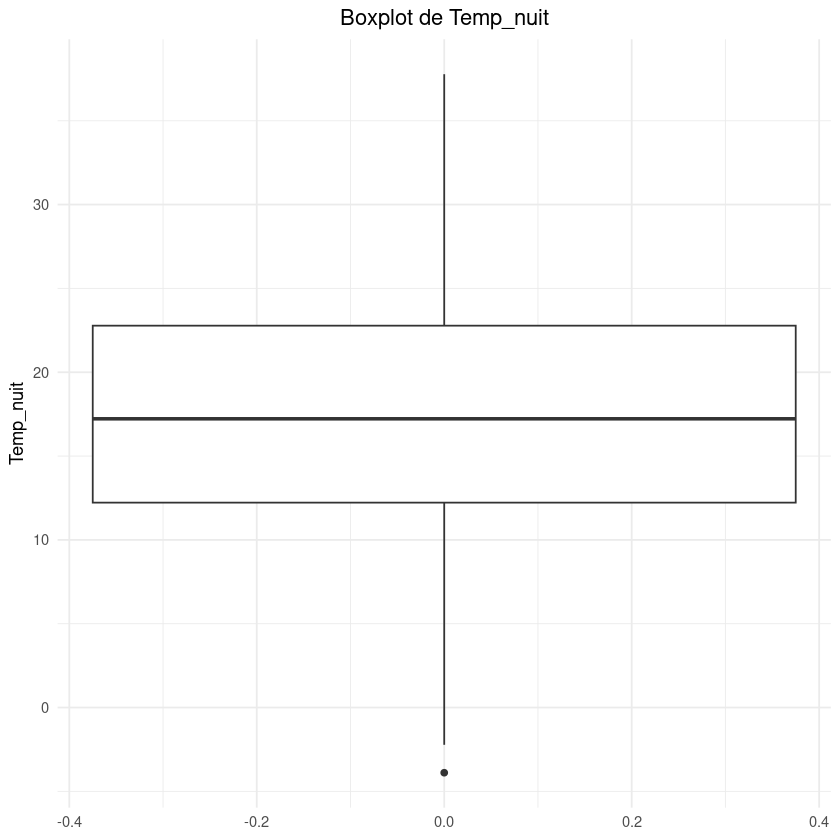

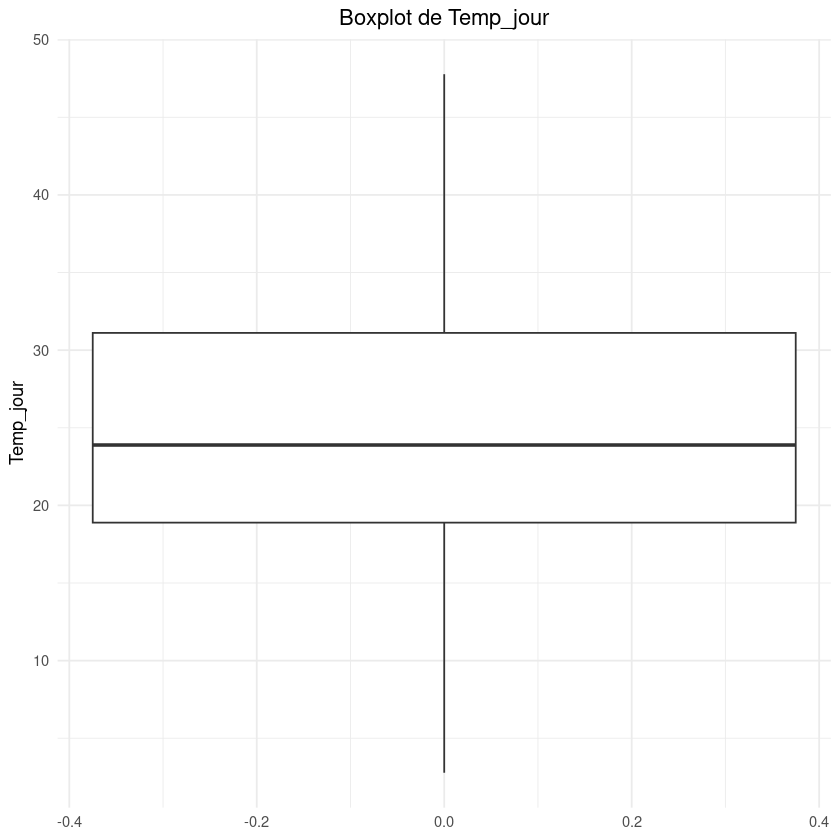

In [15]:
# Identifier les colonnes numériques de type "float" 
float_cols <- names(big_dataset)[sapply(big_dataset, function(x) is.numeric(x) && !all(x == floor(x)))]

# Boucler à travers les colonnes numériques et tracer des boxplots
for (col in float_cols) {
  p <- ggplot(big_dataset, aes_string(y = col)) +
    geom_boxplot() +
    ggtitle(paste("Boxplot de", col)) +
    theme_minimal() +
    theme(plot.title = element_text(hjust = 0.5))
  print(p)
}

## Analyse et Visualisation des données

L'analyse des données implique l'examen des données pour en extraire des informations significatives, tandis que la visualisation des données consiste à créer des graphiques et des diagrammes pour illustrer ces informations de manière claire et compréhensible.

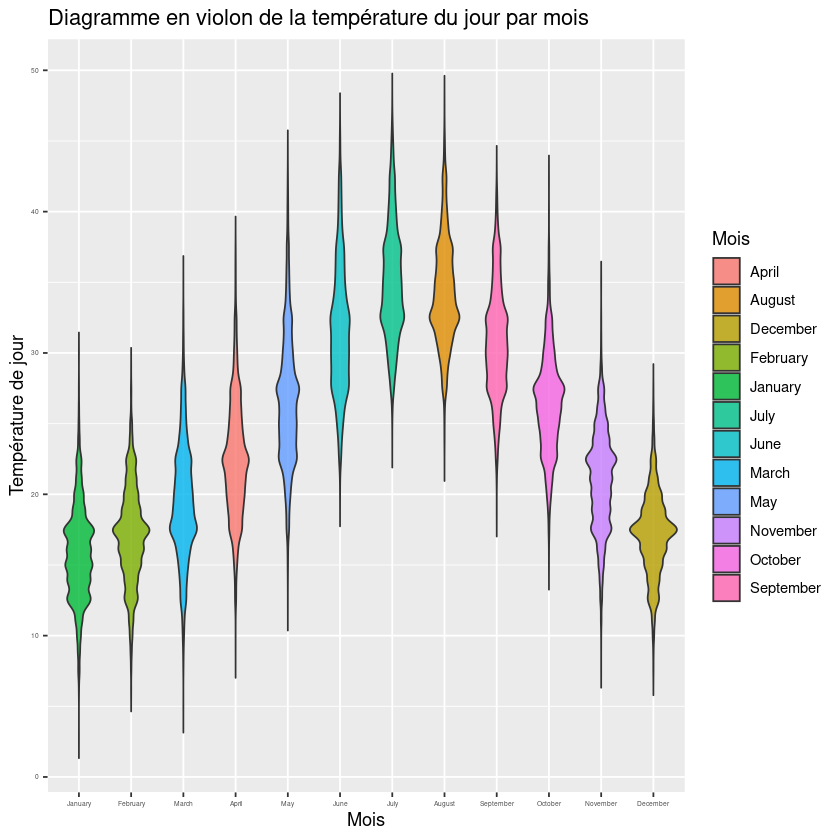

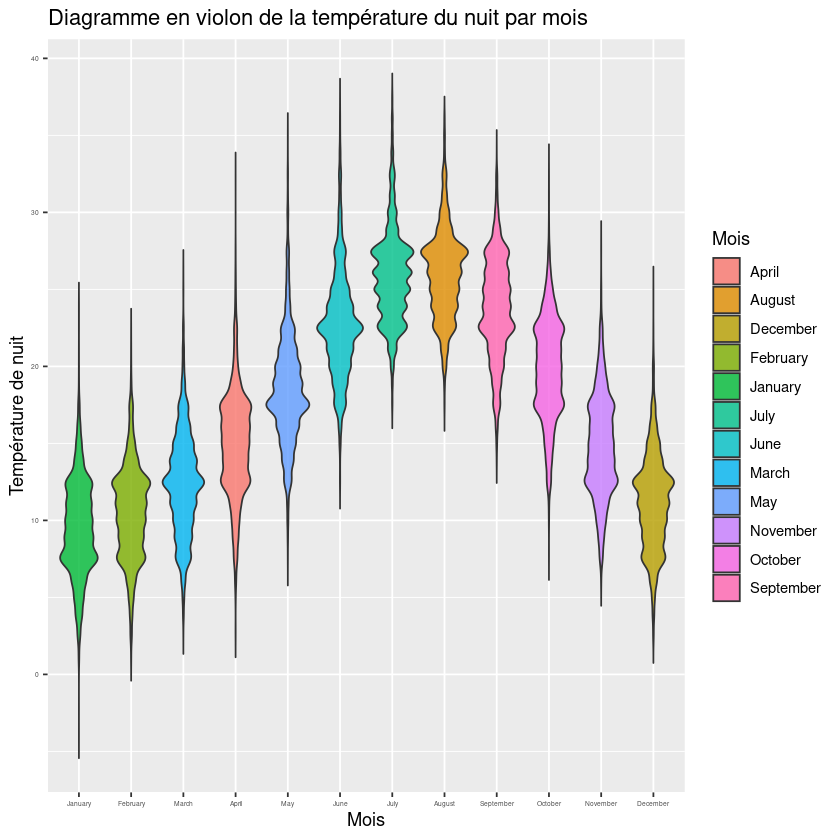

In [26]:
# Fonction pour créer un diagramme en violon
create_violin_plot <- function(data, x_col, y_col, title, x_label, y_label) {
  ggplot(data, aes_string(x = x_col, y = y_col, fill = x_col)) +
    geom_violin(trim = FALSE, alpha = 0.8) +  # Diagramme en violon
    theme(
      axis.text = element_text(size = 4)      # Personnaliser la taille du texte
    ) +
    ggtitle(title) +
    xlab(x_label) + ylab(y_label) +           # Ajouter des étiquettes aux axes
    scale_x_discrete(limits = month.name)     # Ordonner les mois de janvier à décembre
}

# Créer les diagrammes en violon
create_violin_plot(big_dataset, "Mois", "Temp_jour", 
                   "Diagramme en violon de la température du jour par mois", 
                   "Mois", "Température de jour")

create_violin_plot(big_dataset, "Mois", "Temp_nuit", 
                   "Diagramme en violon de la température du nuit par mois", 
                   "Mois", "Température de nuit")

on remarque une température générale élevée pour les mois d'août, juin et juillet, et basse pour décembre, février et janvier. Il y a une grande variance pour les mois de novembre et octobre.

## Analyse Statistique

Pour effectuer une analyse statistique des températures de jour et de nuit par mois, nous allons calculer quelques statistiques descriptives telles que la moyenne, la médiane, l'écart-type et les quartiles. Nous utiliserons les fonctions `mean()`, `median()`, `sd()`, et `quantile()` de R.




```

Ces statistiques nous permettront de mieux comprendre la distribution des températures de jour et de nuit pour chaque mois.
```

In [20]:
# Calculer les statistiques descriptives pour les températures de jour et de nuit par mois
day_temp_stats <- big_dataset %>%
  group_by(Mois) %>%
  summarise(
    mean_day_temp = mean(Temp_jour, na.rm = TRUE),
    sd_day_temp = sd(Temp_jour, na.rm = TRUE),
    min_day_temp = min(Temp_jour, na.rm = TRUE),
    max_day_temp = max(Temp_jour, na.rm = TRUE)
  )

night_temp_stats <- big_dataset %>%
  group_by(Mois) %>%
  summarise(
    mean_night_temp = mean(Temp_nuit, na.rm = TRUE),
    sd_night_temp = sd(Temp_nuit, na.rm = TRUE),
    min_night_temp = min(Temp_nuit, na.rm = TRUE),
    max_night_temp = max(Temp_nuit, na.rm = TRUE)
  )

# Afficher les statistiques descriptives
print(day_temp_stats)
print(night_temp_stats)


# A tibble: 12 × 5
   Mois      mean_day_temp sd_day_temp min_day_temp max_day_temp
   <chr>             <dbl>       <dbl>        <dbl>        <dbl>
 1 April              22.4        4.08         8.89         37.8
 2 August             34.3        3.68        22.8          47.8
 3 December           17.2        2.82         7.22         27.8
 4 February           17.1        3.33         6.11         28.9
 5 January            15.8        3.27         2.78         30  
 6 July               35.0        4.00        23.9          47.8
 7 June               31.6        4.51        20            46.1
 8 March              19.4        4.08         5            35  
 9 May                26.7        4.67        12.2          43.9
10 November           21.0        3.54         7.78         35  
11 October            26.4        3.50        15            42.2
12 September          30.9        3.84        18.9          42.8
# A tibble: 12 × 5
   Mois      mean_night_temp sd_night_temp min_night

### Analyse sur la distribution des jours en Tunisie

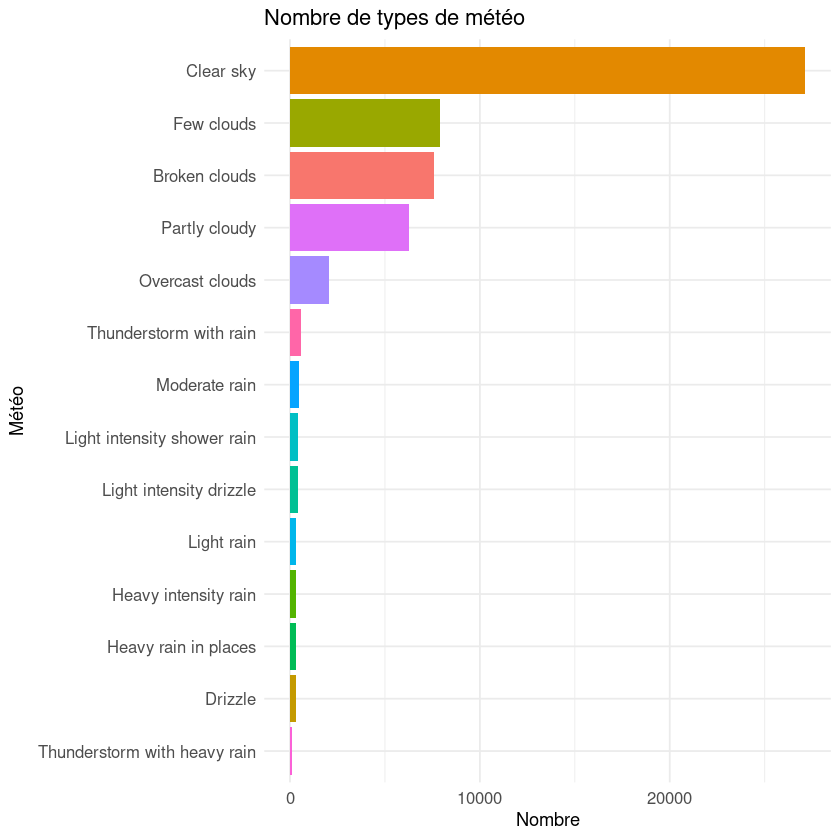

In [27]:
# Grouper par 'Weather' et compter les occurrences
weather_counts <- big_dataset %>%
  count(Meteo)

# Créer un diagramme à barres horizontal
ggplot(weather_counts, aes(x = n, y = reorder(Meteo, n), fill = Meteo)) +
  geom_bar(stat = "identity") +       
  theme_minimal() +
  theme(
    legend.position = "none",                 # Supprimer la légende
    axis.text.x = element_text(size = 10),
    axis.text.y = element_text(size = 10)
  ) +
  xlab("Nombre") +                            # Étiquette de l'axe X
  ylab("Météo") +                             # Étiquette de l'axe Y
  ggtitle("Nombre de types de météo")


On remarque que les jours où le ciel est clair dominent grandement en Tunisie, contrairement aux jours pluvieux qui sont peu fréquents. Pour illustrer cette observation, nous allons créer un diagramme à barres comparant le nombre de jours clairs et pluvieux.


### Analyse sur la distribution des jours pluvieux en Tunisie

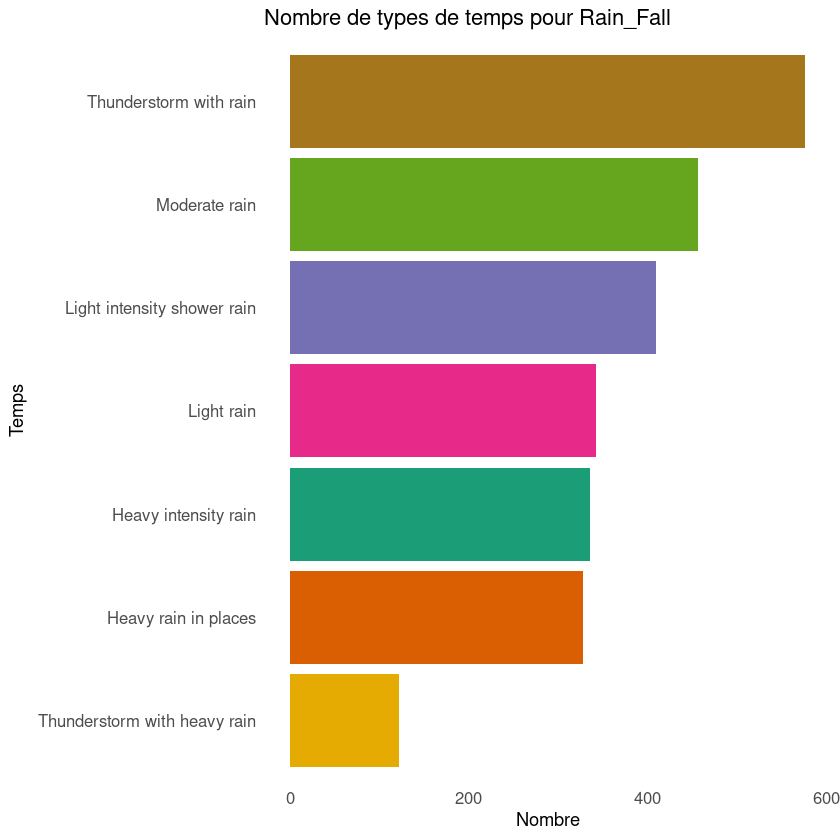

In [32]:
weather_counts <- big_dataset %>%
  filter(Pluie == 1) %>%
  count(Meteo)

# Créer un diagramme à barres horizontal
ggplot(weather_counts, aes(x = n, y = reorder(Meteo, n), fill = Meteo)) +
  geom_bar(stat = "identity") +
  scale_fill_brewer(palette = "Dark2") +       # Appliquer la palette Dark2
  theme_minimal() +
  theme(
    panel.grid = element_blank(),             # Supprimer les lignes de la grille
    axis.line = element_blank(),              # Supprimer les lignes des axes
    legend.position = "none",                 # Supprimer la légende
    axis.text.x = element_text(size = 10),    # Personnaliser la taille du texte de l'axe x
    axis.text.y = element_text(size = 10)     # Personnaliser la taille du texte de l'axe y
  ) +
  xlab("Nombre") +                            # Étiquette de l'axe X
  ylab("Temps") +                             # Étiquette de l'axe Y
  ggtitle("Nombre de types de temps pour Rain_Fall")

# Analyse sur la temperature moyenne par ville


In [33]:

# Calculer la température moyenne
data <- big_dataset %>%
  group_by(Ville, Mois) %>%          # Grouper par Ville et Mois
  summarize(mean_temp = mean(Temp_jour, na.rm = TRUE), .groups = 'drop') %>%  # Calculer la température moyenne
  pivot_wider(names_from = Mois, values_from = mean_temp)  # Restructurer les données au format large

# Afficher le résultat
data

Ville      April    August   December February January  July     June    
1  Hammamet   21.88333 34.37993 17.66229 17.35375 16.37097 35.26165 31.14074
2  beja       21.43704 35.10215 15.29669 15.10993 13.93011 36.24552 32.50000
3  gafsa      23.71852 35.92652 16.21466 16.77071 14.89964 37.12545 34.20556
4  jabinyanah 22.69444 34.08602 18.43688 18.39615 17.08602 34.45878 31.14074
5  jendouba   21.65556 35.22222 15.88610 15.44955 14.48029 36.32079 32.64630
6  kasserine  22.17222 34.76165 15.78256 16.02081 14.49642 36.52688 32.65741
7  sfax       21.48333 31.99104 18.32537 17.80330 16.87814 31.92832 28.95185
8  skhira     23.36296 34.51254 17.73994 18.31370 16.39785 34.95341 31.89074
9  sousse     20.71296 32.12545 17.95102 17.28112 16.58602 32.48746 28.79444
10 tabarka    19.93519 30.82258 16.58702 15.82843 14.92652 31.04659 27.44074
11 tataouine  25.18889 36.02867 17.90323 18.35100 16.74194 36.67204 34.28148
12 tozeur     25.72037 37.30108 17.28395 18.02709 15.84588 38.35842 35.72593
13 tunis      21.67593 33.66308 17.26603 16.80408 15.77419 34.31004 30.36667
14 zaghouan   22.19815 35.38172 16.99522 16.73734 15.50896 36.80287 32.48704
15 zarzis     22.52593 32.92294 18.36718 18.35689 17.12724 32.61290 29.88519
   March    May      November October  September
1  19.15233 26.23477 21.13197 25.90502 30.44743 
2  17.54659 26.15591 19.56579 25.88530 30.68419 
3  19.79032 28.73297 20.34509 26.53763 31.83072 
4  20.40860 26.74373 22.09518 26.88889 30.82960 
5  17.97491 26.53763 19.93743 26.18638 30.79232 
6  18.38530 27.11828 19.30224 24.93548 30.26286 
7  19.40860 25.12186 21.87713 26.35125 29.66443 
8  20.94803 27.73477 21.98331 27.55914 31.72073 
9  18.87634 24.54839 21.40121 25.69534 29.50783 
10 17.17204 22.82079 19.75920 24.60215 27.94929 
11 21.32796 29.55197 22.43648 28.26703 33.39485 
12 21.68100 30.55376 21.79560 28.24194 33.74720 
13 18.57885 25.57527 20.90064 26.18459 30.24049 
14 18.80466 26.86559 20.60865 26.02688 30.83893 
15 20.64875 26.11290 22.40994 27.40143 31.11111

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


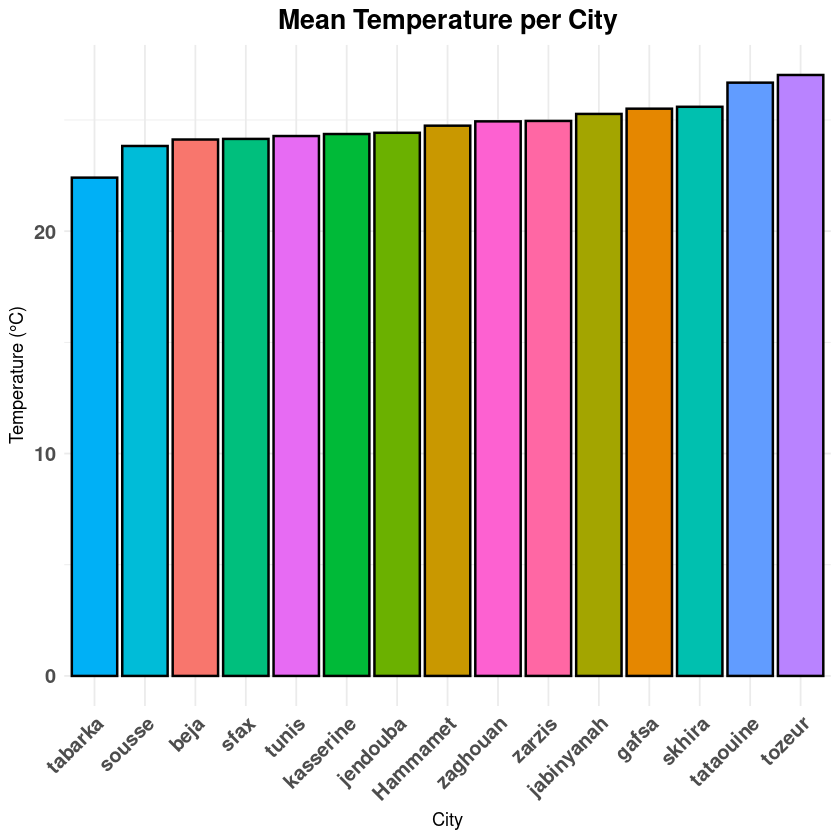

In [39]:
# Compute the mean temperature per city for each month
data$Mean_Temperature <- rowMeans(data[, months], na.rm = TRUE)

# Create a bar plot with enhanced visuals and ordered cities
ggplot(data, aes(x = reorder(Ville, Mean_Temperature), y = Mean_Temperature, fill = Ville)) +
  geom_bar(stat = "identity", color = "black", size = 0.7) +  # Bar plot with border
  labs(
    title = "Mean Temperature per City",  # Title of the plot
    x = "City",                          # Label for x-axis
    y = "Temperature (°C)"               # Label for y-axis
  ) +
  theme_minimal() +                    # Minimal theme
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size = 12, face = "bold"),  # Rotate and style x-axis labels
    axis.text.y = element_text(size = 12, face = "bold"),  # Style y-axis labels
    plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),  # Center and style title
    legend.position = "none"  # Remove legend
  )

Warning message:
“Removed 15 rows containing missing values or values outside the scale range
(`geom_line()`).”


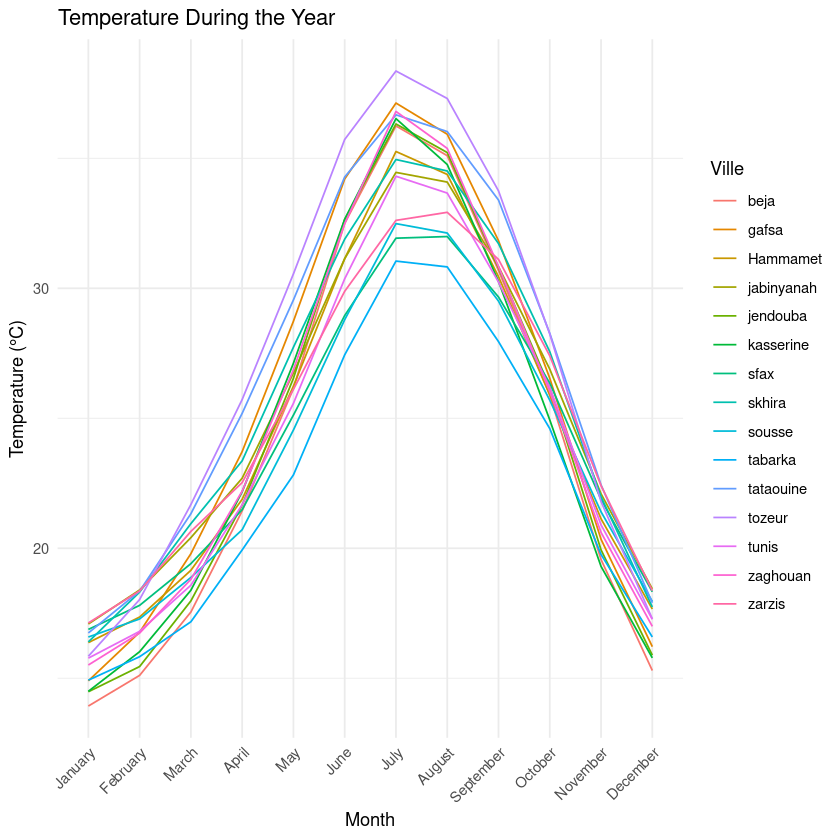

In [40]:


data_melted <- melt(data, id.vars = "Ville", variable.name = "Mois", value.name = "Temperature")

# Create the plot
ggplot(data_melted, aes(x = Mois, y = Temperature, color = Ville, group = Ville)) +
  geom_line() +                                # Line plot for each city
  labs(
    title = "Temperature During the Year",      # Plot title
    x = "Month",                                # X-axis label
    y = "Temperature (°C)"                      # Y-axis label
  ) +
  theme_minimal() +                             # Minimal theme
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +  # Rotate x-axis labels for readability
  scale_x_discrete(limits = months) +           # Ensure months are ordered correctly
  theme(legend.position = "right")

# Analyse des jours pluvieux


`summarise()` has grouped output by 'Ville'. You can override using the
`.groups` argument.


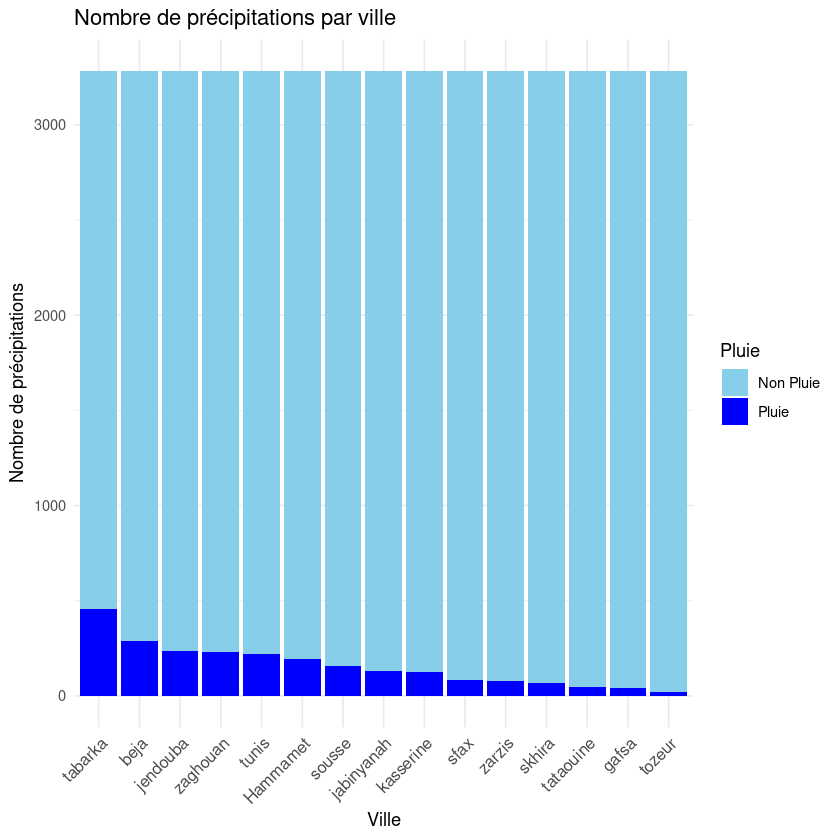

In [49]:
# Filtrer les données pour enlever l'année 2024
big_dataset_filtered <- big_dataset %>%
  filter(Annee != 2024)

# Grouper par 'City' et 'Rain_Fall' et compter les occurrences
rainfall_counts <- big_dataset_filtered %>%
  group_by(Ville, Pluie) %>%
  summarise(n = n()) %>%
  ungroup()

# Transformer la colonne 'Rain_Fall' en facteur avec des labels "No Rain" et "Rain"
rainfall_counts$Pluie <- factor(rainfall_counts$Pluie, levels = c(0, 1), labels = c("Non Pluie", "Pluie"))

# Calculer le total des précipitations par ville pour ordonner les villes
rainfall_counts <- rainfall_counts %>%
  group_by(Ville) %>%
  mutate(total_rain = sum(n[Pluie == "Pluie"])) %>%
  ungroup() %>%
  arrange(desc(total_rain))

# Créer le diagramme à barres
ggplot(rainfall_counts, aes(x = reorder(Ville, -total_rain), y = n, fill = Pluie)) +
  geom_bar(stat = "identity", position = "stack") +
  scale_fill_manual(values = c("skyblue", "blue")) +  
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size = 10)  # Incliner et espacer les étiquettes des axes des x
  ) +
  xlab("Ville") +                             # Étiquette de l'axe X
  ylab("Nombre de précipitations") +          # Étiquette de l'axe Y
  ggtitle("Nombre de précipitations par ville")

on remarque un dominance des jour sans pluis avec les ville au sud la pluis devient de plus en plus rare


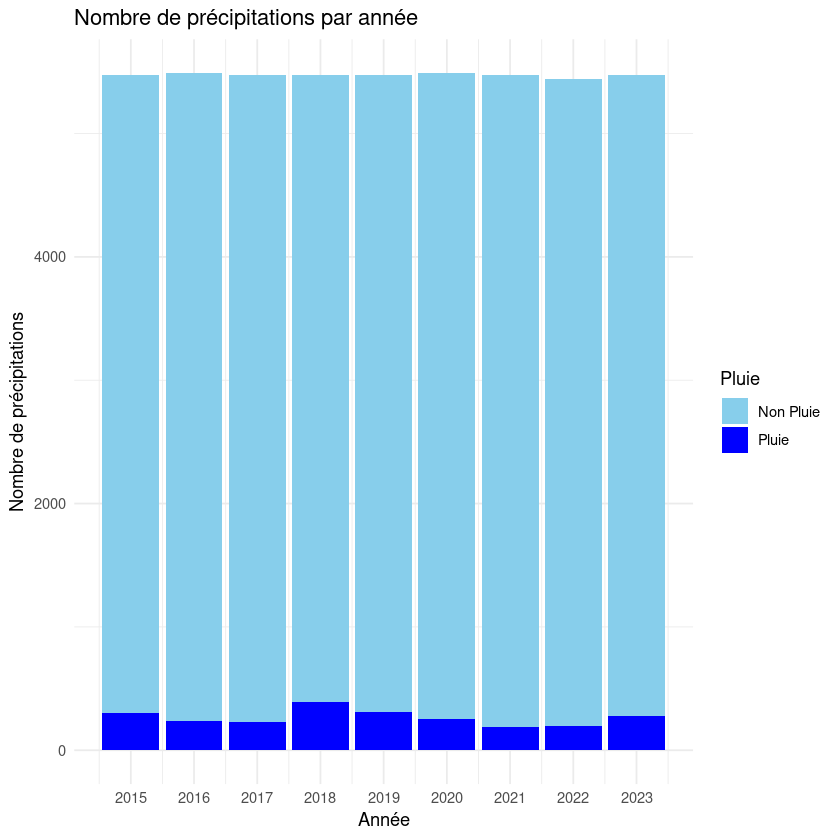

In [52]:
# Filtrer les données pour enlever l'année 2024
big_dataset_filtered <- big_dataset %>%
  filter(Annee != 2024)

# Grouper par 'Year' et compter les occurrences de 'Rain_Fall'
rainfall_counts <- big_dataset_filtered %>%
  group_by(Annee) %>%
  count(Pluie)

# Transformer la colonne 'Rain_Fall' en facteur avec des labels "No Rain" et "Rain"
rainfall_counts$Pluie <- factor(rainfall_counts$Pluie, levels = c(0, 1), labels = c("Non Pluie", "Pluie"))

ggplot(rainfall_counts, aes(x = Annee, y = n, fill = Pluie)) +
  geom_bar(stat = "identity", position = "stack") +
  scale_fill_manual(values = c("skyblue", "blue")) +  
  theme_minimal() +
  scale_x_continuous(breaks = unique(rainfall_counts$Annee)) +  # Afficher toutes les années sur l'axe x
  xlab("Année") +                             # Étiquette de l'axe X
  ylab("Nombre de précipitations") +          # Étiquette de l'axe Y
  ggtitle("Nombre de précipitations par année")

L'analyse de la courbe ci-dessus révèle une tendance notable dans les précipitations annuelles. En observant les barres empilées, on peut voir une prédominance des jours sans pluie ("No Rain") par rapport aux jours avec pluie ("Rain") au fil des années. Cette tendance est particulièrement marquée dans les villes situées au sud, où les précipitations deviennent de plus en plus rares. Les variations annuelles montrent également des fluctuations dans le nombre total de jours de précipitations, mais la proportion de jours sans pluie reste élevée. Cette observation pourrait indiquer un changement climatique ou des conditions météorologiques spécifiques à ces régions

**OBJECTIF**

L'objectif de cette analyse est de prédire le potentiel d'une journée de forte pluie à l'avance, nous permettant ainsi de prendre des mesures préventives.

**Étapes:**
1. **Ajouter des Variables de Décalage**  
   Créez des variables décalées pour `Night_temp` et `Day_temp` correspondant aux jours $N-1$ à $N-7$. Cela nous permet d'analyser l'impact des modèles de température des jours précédents sur la probabilité de jours pluvieux.  
   **Remarque** : Les lignes en haut correspondant aux jours de décalage auront des valeurs `NaN` car il n'y a pas de jours antérieurs de référence. Ces lignes seront supprimées.

2. **Catégoriser les Jours Pluvieux**  
   Les jours pluvieux seront catégorisés en **jours de forte pluie** et **jours de pluie légère** pour une analyse plus granulaire.

In [62]:
# Créer un DataFrame décalé
shifted_df <- big_dataset %>%
  group_by(City) %>%
  arrange(City) %>%        # Assurer que les données sont ordonnées dans chaque ville
  mutate(
    across(
      c(Night_temp, Day_temp),
      list(
        lag_1 = ~lag(., 1),
        lag_2 = ~lag(., 2),
        lag_3 = ~lag(., 3),
        lag_4 = ~lag(., 4),
        lag_5 = ~lag(., 5),
        lag_6 = ~lag(., 6),
        lag_7 = ~lag(., 7)
      ),
      .names = "{.col}_{.fn}"             # Créer des noms de colonnes pour les variables décalées
    )
  ) %>%
  ungroup() %>%                               # Supprimer la structure de regroupement
  drop_na()                                   # Supprimer les lignes avec des valeurs NA

# Afficher le DataFrame résultant
shifted_df

Year Month    Day Night_temp Day_temp  Weather                     City  
1     2015 January   8   7.777778  13.888889 Partly cloudy               beja  
2     2015 January   9   7.777778  13.888889 Partly cloudy               beja  
3     2015 January  10  10.000000  16.111111 Clear sky                   beja  
4     2015 January  11   8.888889  18.888889 Clear sky                   beja  
5     2015 January  12  12.222222  16.111111 Few clouds                  beja  
6     2015 January  13   7.222222  15.000000 Clear sky                   beja  
7     2015 January  14   8.888889  18.888889 Clear sky                   beja  
8     2015 January  15   6.111111  17.777778 Clear sky                   beja  
9     2015 January  16   8.888889  20.000000 Clear sky                   beja  
10    2015 January  17   7.777778  16.111111 Overcast clouds             beja  
11    2015 January  18   7.777778   8.888889 Heavy intensity rain        beja  
12    2015 January  19   3.888889  12.222222 Few clouds                  beja  
13    2015 January  20   5.000000  12.777778 Clear sky                   beja  
14    2015 January  21   7.222222  13.888889 Clear sky                   beja  
15    2015 January  22   6.111111  12.777778 Few clouds                  beja  
16    2015 January  23   5.000000  11.111111 Drizzle                     beja  
17    2015 January  24   7.777778  11.111111 Broken clouds               beja  
18    2015 January  25   7.222222   8.888889 Heavy rain in places        beja  
19    2015 January  26   3.888889  11.111111 Drizzle                     beja  
20    2015 January  27   7.222222  10.000000 Drizzle                     beja  
21    2015 January  28   7.222222  11.111111 Heavy rain in places        beja  
22    2015 January  29   7.222222  12.222222 Drizzle                     beja  
23    2015 January  30   6.111111  16.111111 Overcast clouds             beja  
24    2015 January  31  11.111111  17.777778 Drizzle                     beja  
25    2016 January   1  11.111111  16.111111 Broken clouds               beja  
26    2016 January   2  10.000000  17.777778 Clear sky                   beja  
27    2016 January   3  11.111111  15.000000 Few clouds                  beja  
28    2016 January   4  13.888889  18.888889 Broken clouds               beja  
29    2016 January   5  12.222222  20.000000 Broken clouds               beja  
30    2016 January   6  13.888889  11.111111 Light intensity drizzle     beja  
⋮     ⋮    ⋮        ⋮   ⋮          ⋮         ⋮                           ⋮     
54061 2023 December  2  17.222222  23.88889  Broken clouds               zarzis
54062 2023 December  3  18.888889  17.22222  Heavy intensity rain        zarzis
54063 2023 December  4  15.000000  17.22222  Clear sky                   zarzis
54064 2023 December  5  11.111111  18.88889  Partly cloudy               zarzis
54065 2023 December  6  15.000000  17.22222  Overcast clouds             zarzis
54066 2023 December  7  15.000000  17.77778  Clear sky                   zarzis
54067 2023 December  8  11.111111  18.88889  Broken clouds               zarzis
54068 2023 December  9  12.777778  17.22222  Light intensity shower rain zarzis
54069 2023 December 10  16.111111  17.22222  Clear sky                   zarzis
54070 2023 December 11  15.000000  18.88889  Clear sky                   zarzis
54071 2023 December 12  12.777778  21.11111  Broken clouds               zarzis
54072 2023 December 13  13.888889  23.88889  Few clouds                  zarzis
54073 2023 December 14  16.111111  20.00000  Partly cloudy               zarzis
54074 2023 December 15  12.777778  17.77778  Clear sky                   zarzis
54075 2023 December 16  13.888889  17.22222  Few clouds                  zarzis
54076 2023 December 17  12.222222  15.00000  Clear sky                   zarzis
54077 2023 December 18   8.888889  13.88889  Broken clouds               zarzis
54078 2023 December 19  13.888889  16.11111  Partly cloudy               zarzis
54079 

In [63]:
# Filtrer les données pour les jours de pluie
rainy_data <- shifted_df %>%
  filter(Rain_Fall == 1)

# Définir les conditions météorologiques pour les fortes pluies
heavy_rain_conditions <- c(
  "Thunderstorm with rain",
  "Heavy rain in places",
  "Heavy intensity rain",
  "Thunderstorm with heavy rain"
)

# Catégoriser les jours de pluie en "Forte" et "Faible"
rainy_data <- rainy_data %>%
  mutate(
    Rain_type = ifelse(Weather %in% heavy_rain_conditions, "Forte", "Faible")
  )

# Afficher les données résultantes
rainy_data

Year Month    Day Night_temp Day_temp  Weather                      City  
1    2015 January  18   7.777778   8.888889 Heavy intensity rain         beja  
2    2015 January  25   7.222222   8.888889 Heavy rain in places         beja  
3    2015 January  28   7.222222  11.111111 Heavy rain in places         beja  
4    2016 January  16   7.777778   7.222222 Thunderstorm with rain       beja  
5    2016 January  17   6.111111   7.777778 Thunderstorm with heavy rain beja  
6    2017 January   8   5.000000  11.111111 Light rain                   beja  
7    2017 January  16   3.888889   7.222222 Light intensity shower rain  beja  
8    2017 January  17   5.000000   6.111111 Light rain                   beja  
9    2017 January  25   6.111111  12.222222 Heavy rain in places         beja  
10   2018 January  21  11.111111  16.111111 Light intensity shower rain  beja  
11   2019 January  25   8.888889  10.000000 Moderate rain                beja  
12   2019 January  30   6.111111  12.777778 Moderate rain                beja  
13   2021 January  12   8.888889  11.111111 Moderate rain                beja  
14   2021 January  16  10.000000  11.111111 Heavy rain in places         beja  
15   2021 January  31  16.111111  12.777778 Moderate rain                beja  
16   2022 January   8   7.777778   8.888889 Heavy intensity rain         beja  
17   2022 January  10  12.222222  11.111111 Heavy intensity rain         beja  
18   2023 January   5   7.222222  16.111111 Light intensity shower rain  beja  
19   2023 January   6   7.222222  16.111111 Light rain                   beja  
20   2023 January  18  10.000000  17.222222 Light intensity shower rain  beja  
21   2023 January  20   3.888889  10.000000 Heavy intensity rain         beja  
22   2023 January  21   7.222222   6.111111 Heavy intensity rain         beja  
23   2023 January  26   2.222222   8.888889 Heavy intensity rain         beja  
24   2023 January  27   7.777778  11.111111 Light intensity shower rain  beja  
25   2024 January   8   7.777778   8.888889 Light rain                   beja  
26   2024 January   9   8.888889  11.111111 Light intensity shower rain  beja  
27   2024 January  12  11.111111  12.777778 Heavy intensity rain         beja  
28   2024 January  20  13.888889  17.222222 Light rain                   beja  
29   2015 February  2   5.000000   8.888889 Light intensity shower rain  beja  
30   2015 February  5   7.777778  11.111111 Light intensity shower rain  beja  
⋮    ⋮    ⋮        ⋮   ⋮          ⋮         ⋮                            ⋮     
2526 2015 November 14  18.88889   21.11111  Thunderstorm with rain       zarzis
2527 2015 November 18  15.00000   21.11111  Thunderstorm with rain       zarzis
2528 2016 November 19  16.11111   17.77778  Thunderstorm with heavy rain zarzis
2529 2016 November 29  15.00000   18.88889  Thunderstorm with rain       zarzis
2530 2017 November 10  18.88889   22.22222  Thunderstorm with rain       zarzis
2531 2017 November 11  17.22222   18.88889  Heavy rain in places         zarzis
2532 2017 November 12  15.00000   20.00000  Light rain                   zarzis
2533 2018 November  1  20.00000   22.77778  Thunderstorm with rain       zarzis
2534 2018 November  2  18.88889   21.11111  Thunderstorm with rain       zarzis
2535 2018 November 10  13.88889   20.00000  Thunderstorm with rain       zarzis
2536 2018 November 11  17.22222   20.00000  Heavy rain in places         zarzis
2537 2018 November 17  18.88889   20.00000  Thunderstorm with rain       zarzis
2538 2020 November 17  16.11111   20.00000  Heavy rain in places         zarzis
2539 2020 November 18  16.11111   20.00000  Moderate rain                zarzis
2540 2020 November 24  16.11111   20.00000  Light intensity shower rain  zarzis
2541 2020 November 25  17.22222   18.88889  Moderate rain                zarzis
2542 2022 November 27  17.77778   18.88889  Light intensity shower rain  zarzis
2543 2023 November 22  17.22222   16.11111  Heavy intensity rain         zarzis
2544 

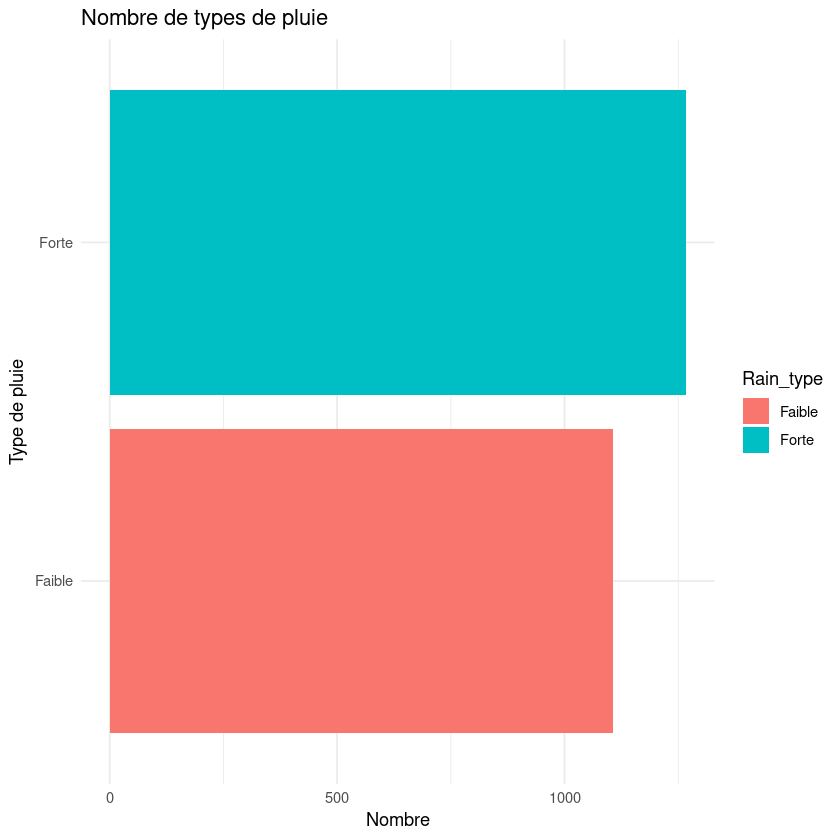

In [47]:


# Compter les occurrences de chaque type de pluie
rain_type_counts <- rainy_data %>%
  count(Rain_type)

# Créer un diagramme à barres horizontal
ggplot(rain_type_counts, aes(x = n, y = Rain_type, fill = Rain_type)) +
  geom_bar(stat = "identity") +
  labs(
    title = "Nombre de types de pluie",
    x = "Nombre",
    y = "Type de pluie"
  ) +
  theme_minimal()

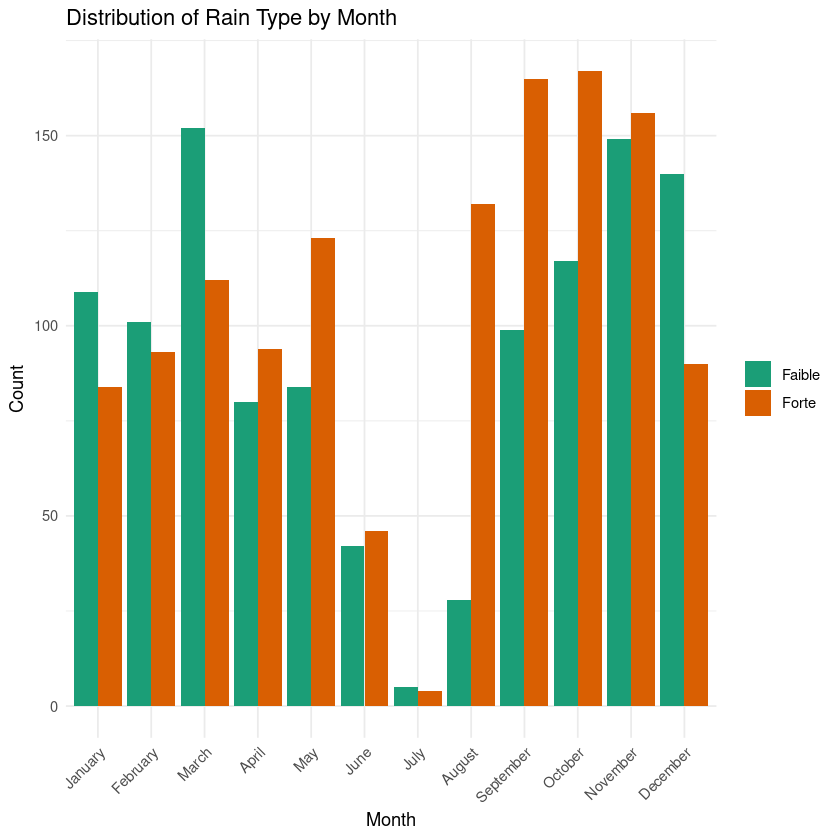

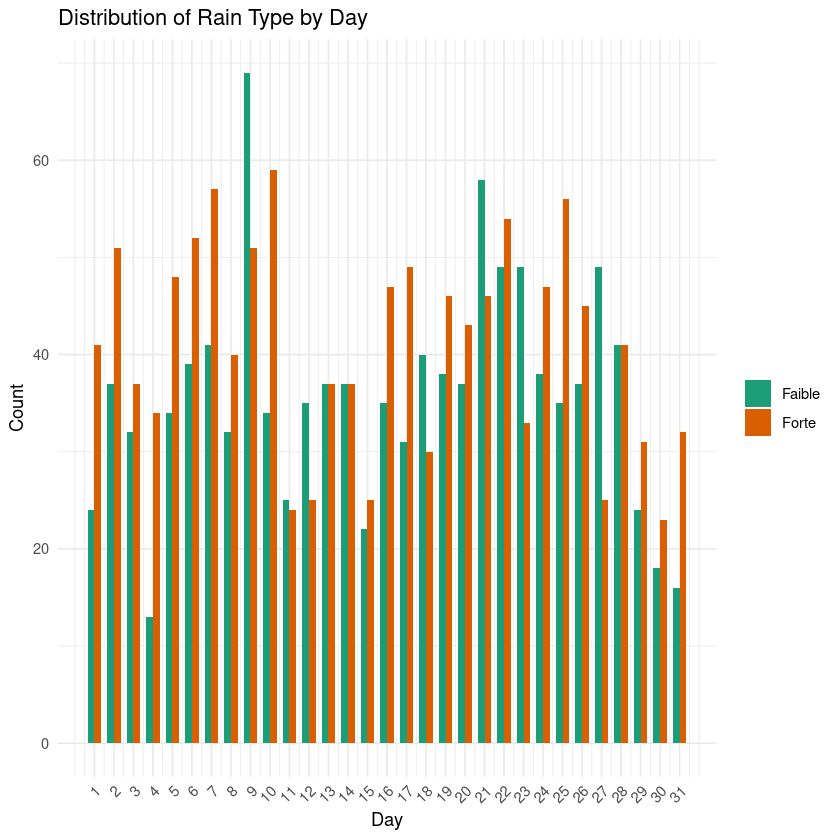

In [48]:
# Load necessary library
library(ggplot2)

# List of columns to visualize
columns <- c("Month", "Day")

# Define the order of months
month_order <- c("January", "February", "March", "April", "May", "June", 
                 "July", "August", "September", "October", "November", "December")

# Loop through the columns and create count plots
for (col in columns) {
  plot <- ggplot(rainy_data, aes_string(x = col, fill = "Rain_type")) +
    geom_bar(position = "dodge", width = ifelse(col == "Day", 0.7, 0.9)) +  # Adjust bar width for "Day"
    labs(
      title = paste("Distribution of Rain Type by", col),
      x = col,
      y = "Count"
    ) +
    theme_minimal() +
    theme(
      axis.text.x = element_text(angle = 45, hjust = 1),  # Rotate x-axis labels
      legend.title = element_blank()                     # Remove legend title
    ) +
    scale_fill_manual(values = c("Faible" = "#1b9e77", "Forte" = "#d95f02"))  # Custom colors
  
  # Apply scale_x_continuous only for "Day" column
  if (col == "Day") {
    plot <- plot + scale_x_continuous(breaks = 1:31)  # Ensure days are fully displayed from 1 to 31
  }
  
  # Apply scale_x_discrete with month order for "Month" column
  if (col == "Month") {
    plot <- plot + scale_x_discrete(limits = month_order)  # Order months
  }
  
  print(plot)  # Print the plot within the loop
}

Les deux graphiques générés montrent la distribution des types de pluie ("Faible" et "Forte") en fonction du mois et du jour. Voici quelques déductions basées sur ces visualisations :

1. **Distribution par Mois** :
   - Le graphique de la distribution par mois révèle des variations saisonnières dans les types de pluie. Par exemple, certains mois peuvent montrer une prédominance de pluie "Forte" par rapport à d'autres mois où la pluie "Faible" est plus courante.
   

2. **Distribution par Jour** :
   - Le graphique de la distribution par jour montre comment les types de pluie varient au cours d'un mois. pour une étude sur une base quotidienne
  
En résumé, ces graphiques permettent de visualiser les tendances des types de pluie à différentes échelles temporelles, offrant des insights précieux pour comprendre les patterns météorologiques.

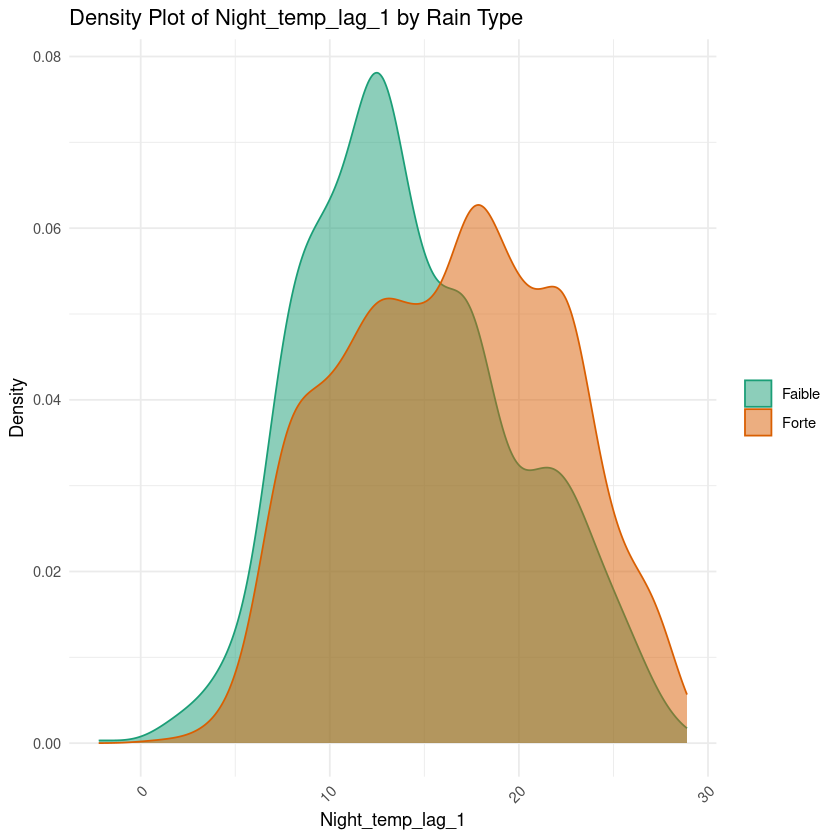

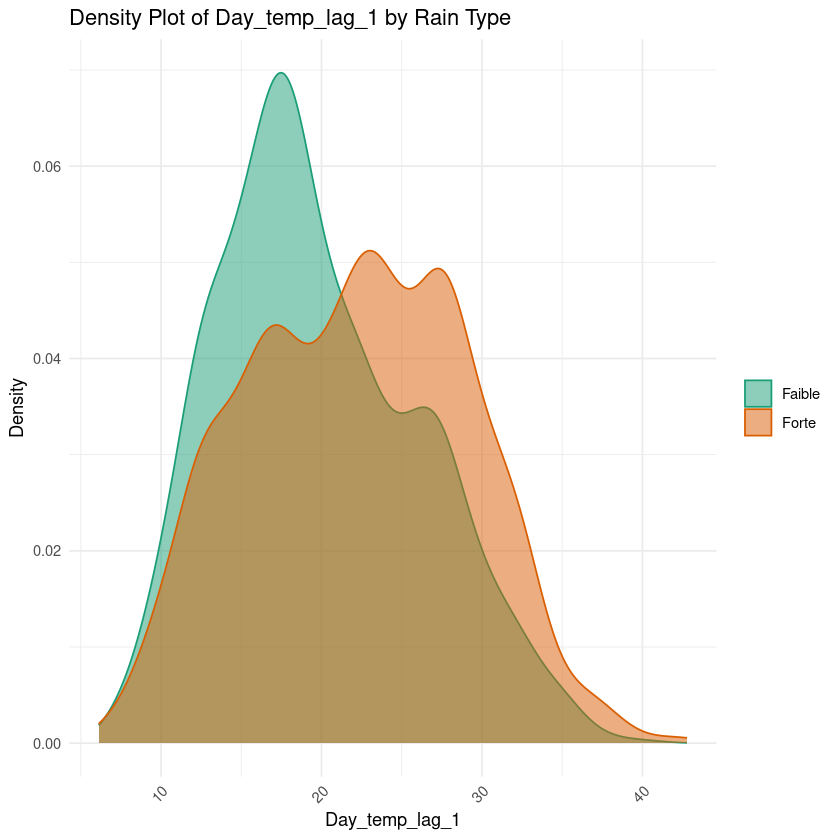

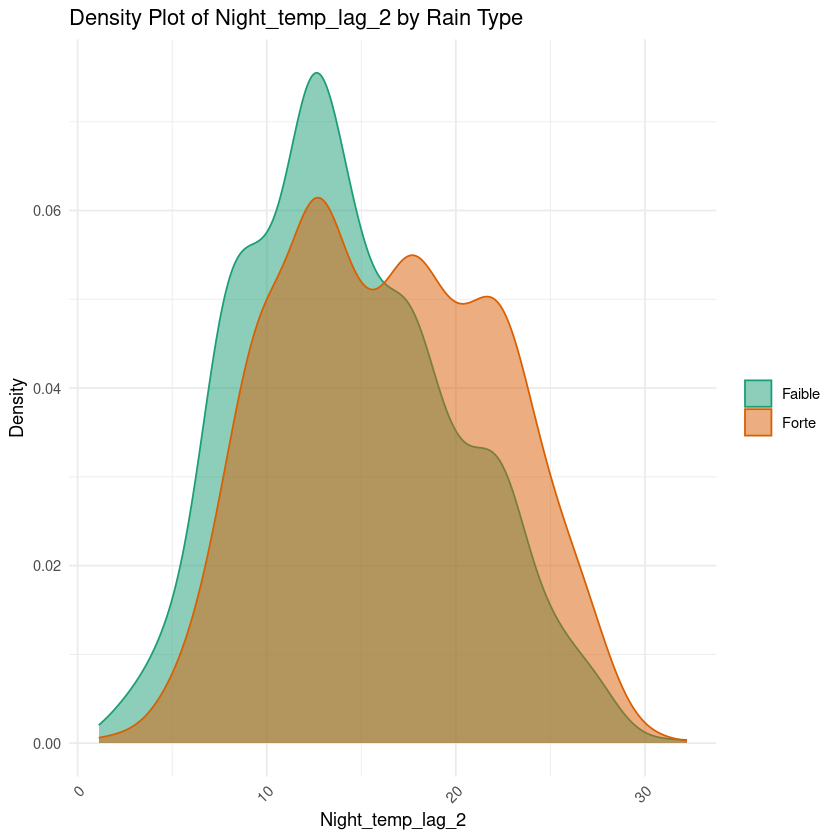

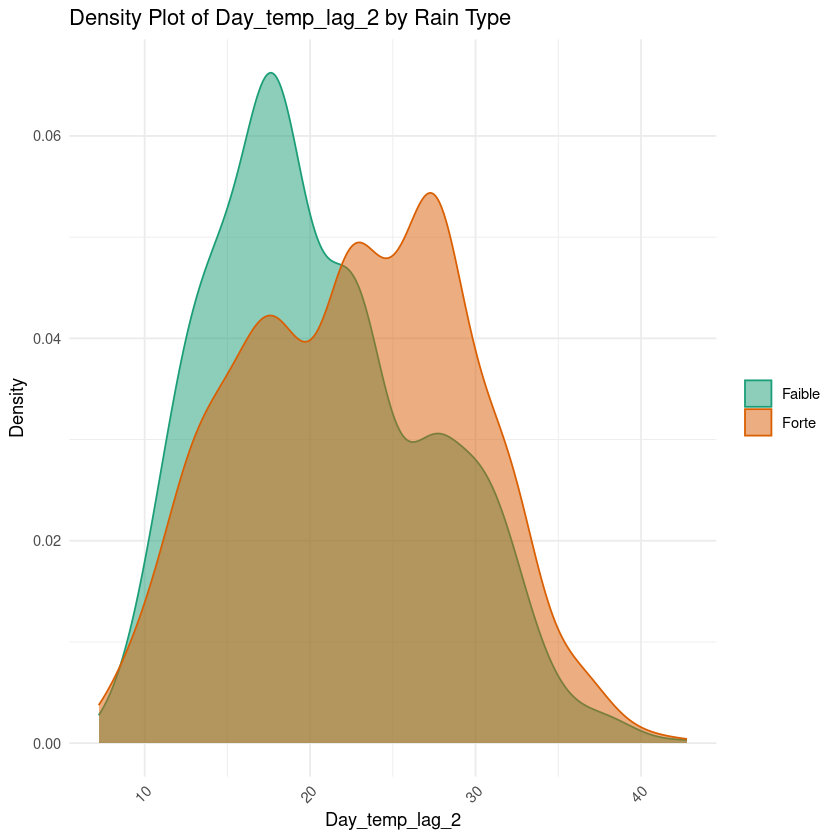

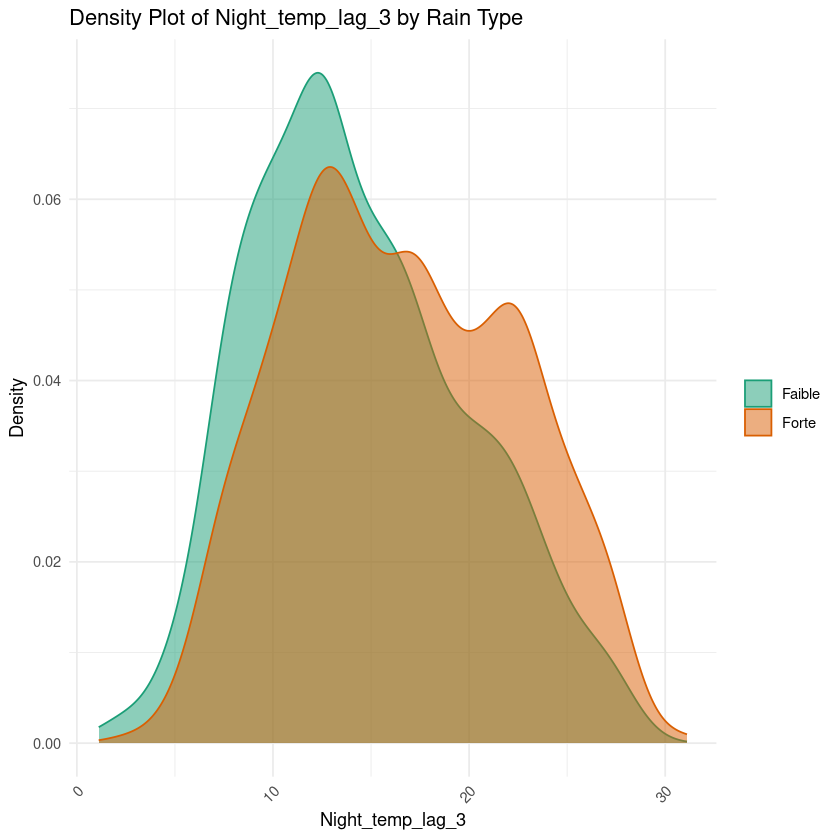

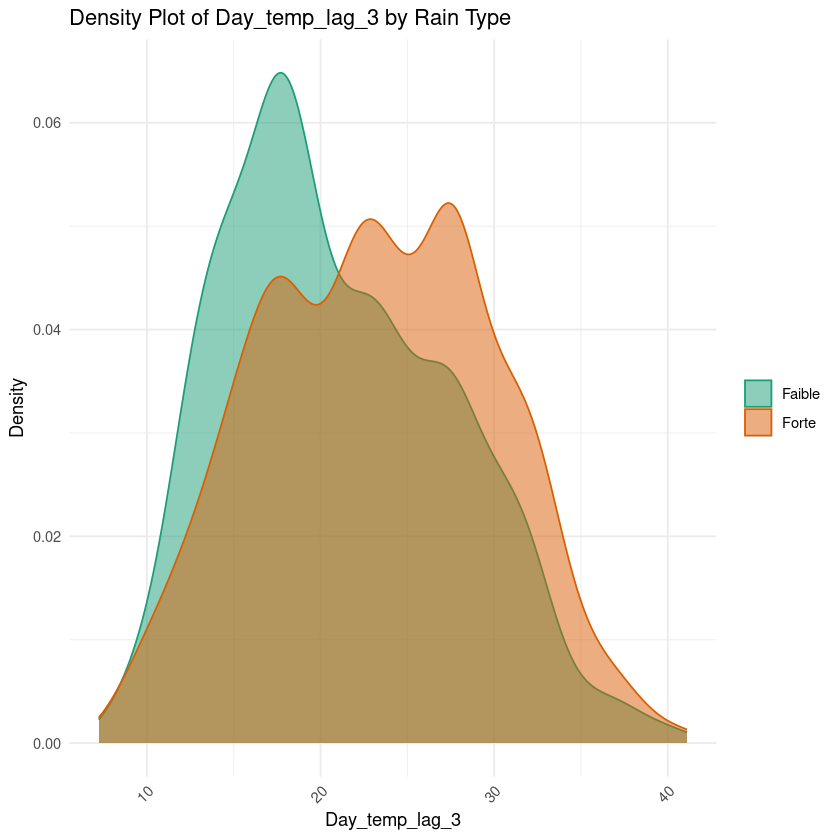

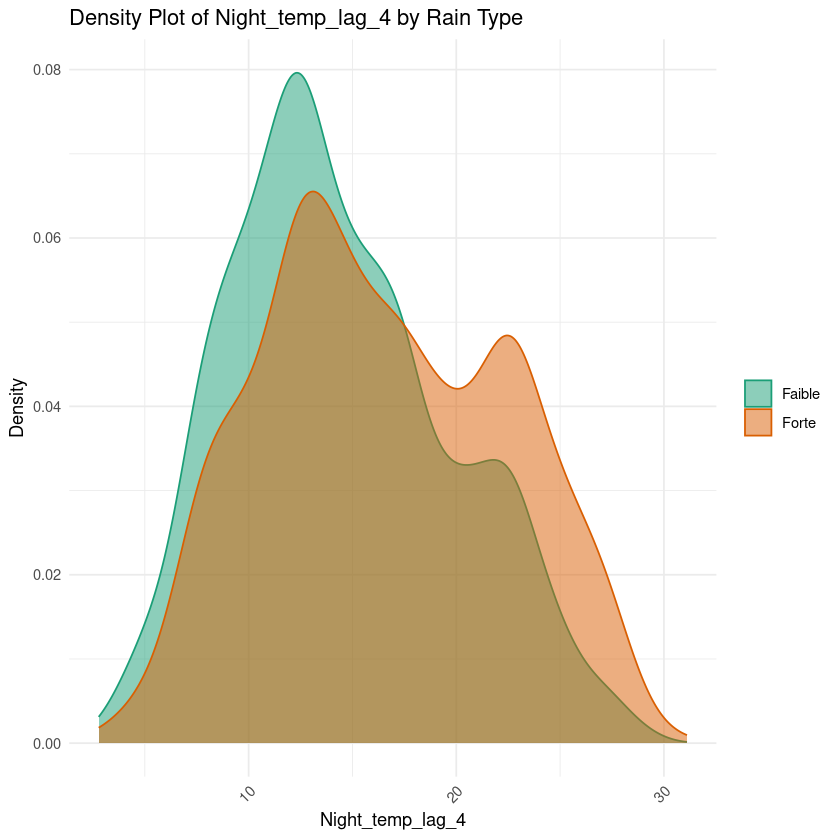

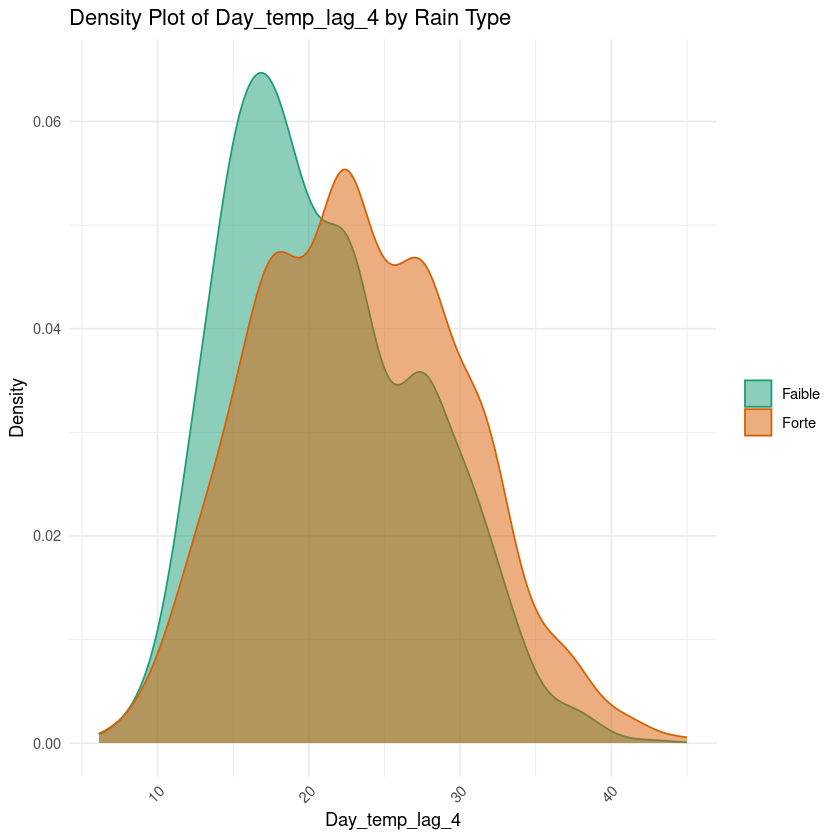

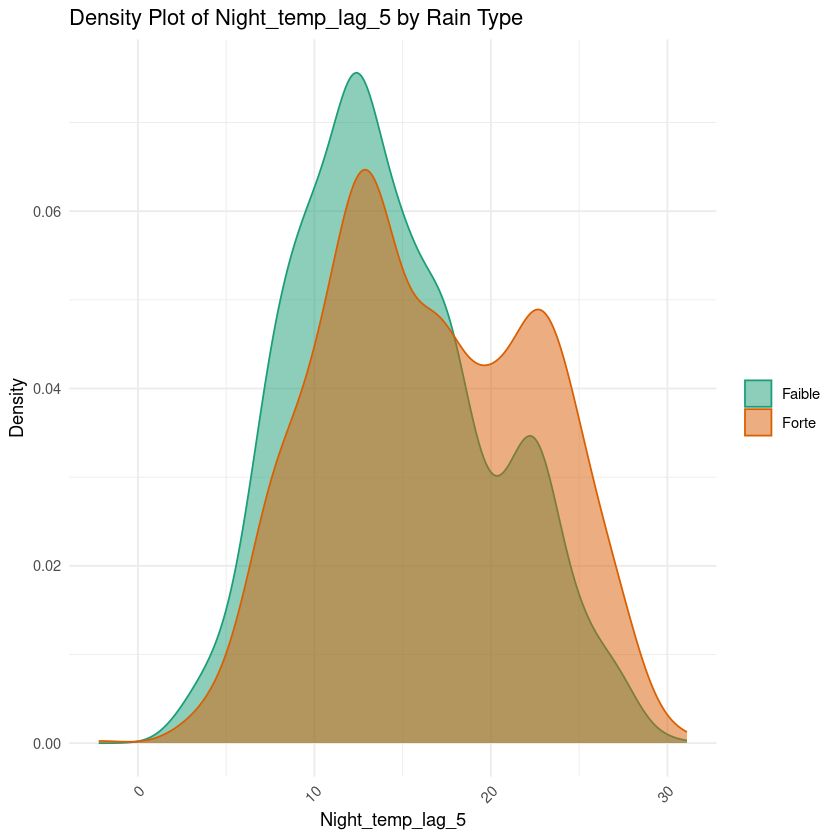

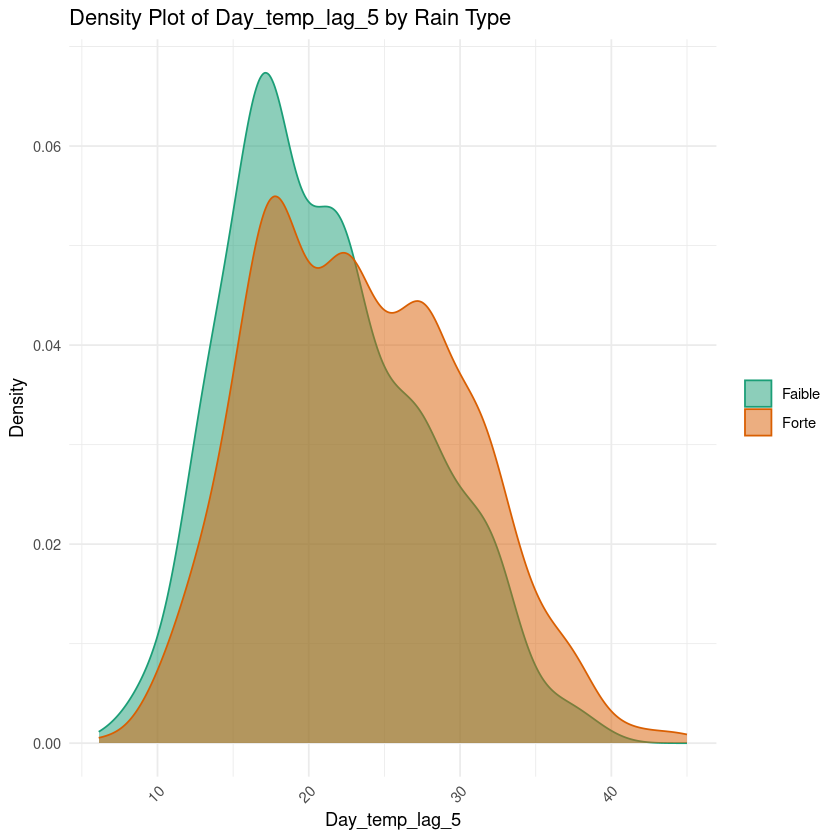

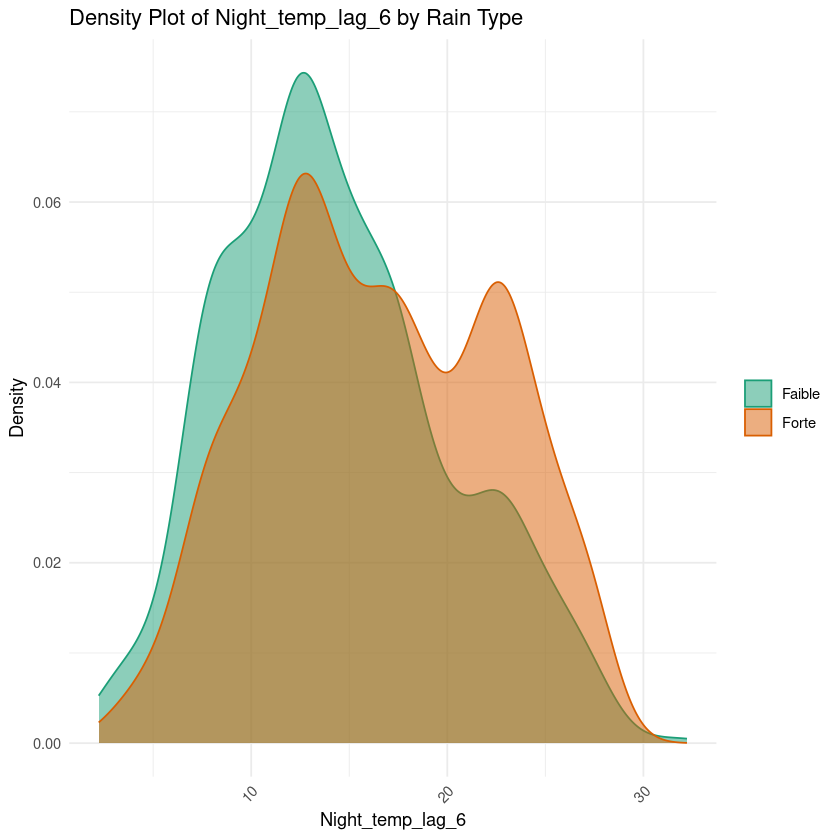

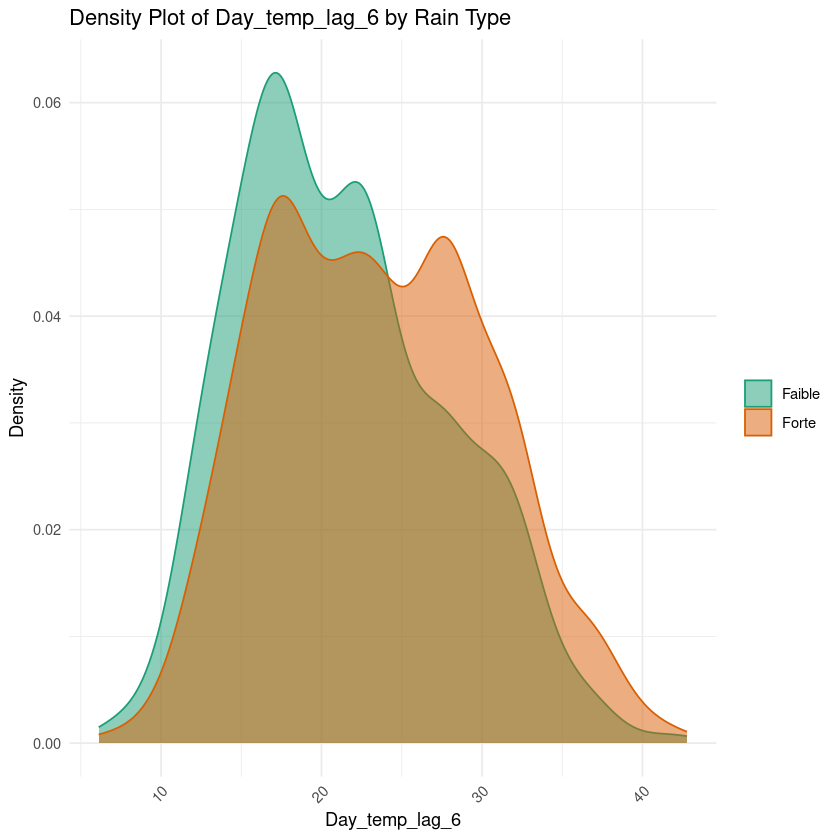

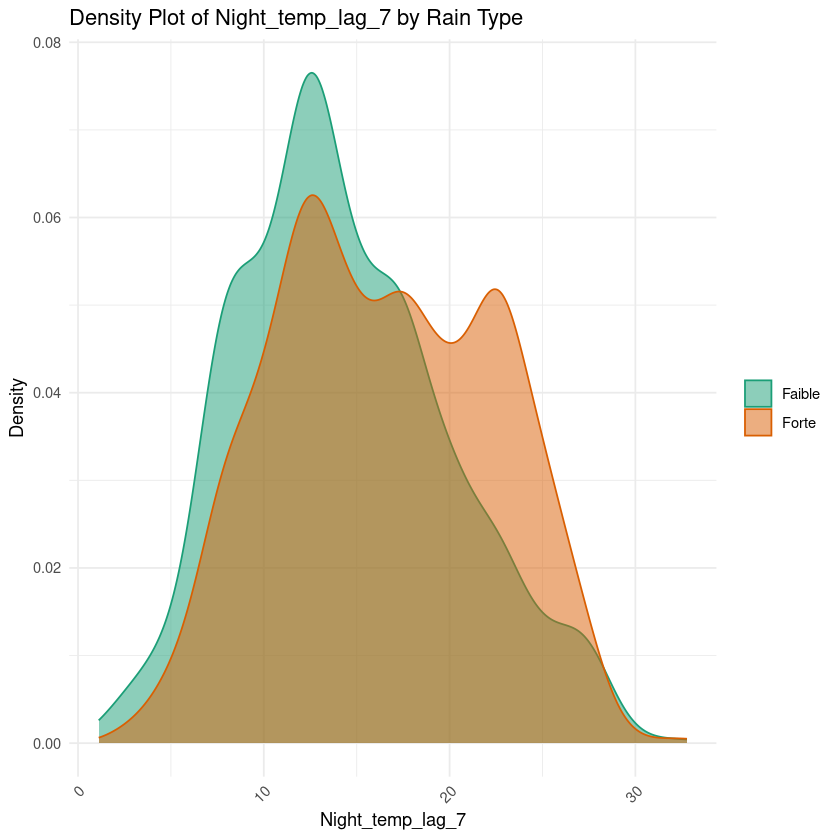

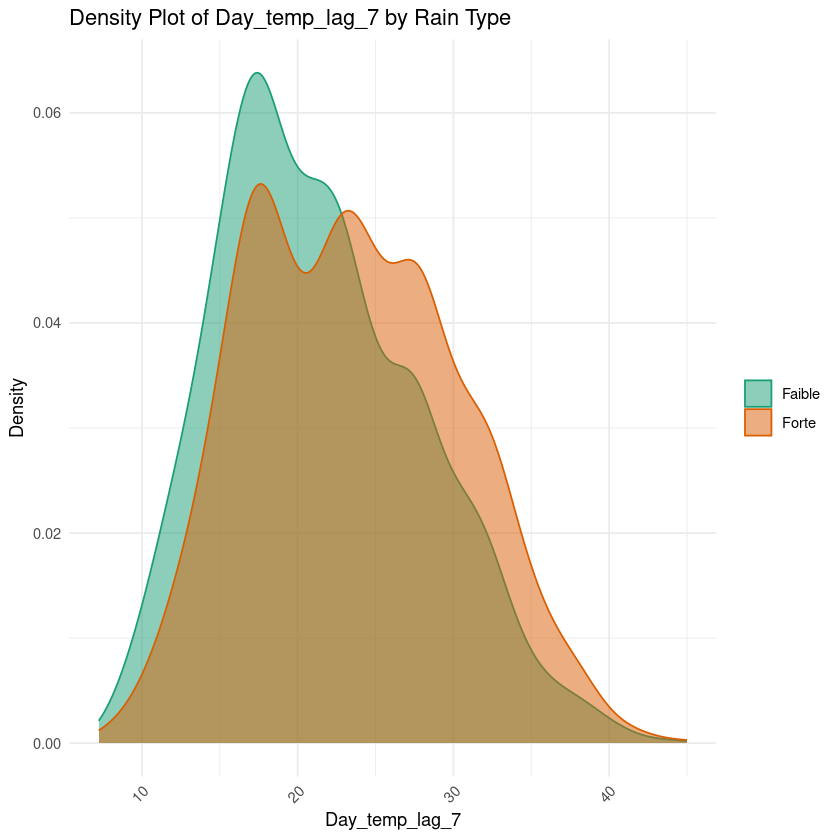

In [49]:
# List of lagged variables to visualize
columns <- c(
  "Night_temp_lag_1", "Day_temp_lag_1", "Night_temp_lag_2", "Day_temp_lag_2",
  "Night_temp_lag_3", "Day_temp_lag_3", "Night_temp_lag_4", "Day_temp_lag_4",
  "Night_temp_lag_5", "Day_temp_lag_5", "Night_temp_lag_6", "Day_temp_lag_6",
  "Night_temp_lag_7", "Day_temp_lag_7"
)

# Loop through each lagged variable and create density plots
for (col in columns) {
  p <- ggplot(rainy_data, aes_string(x = col, fill = "Rain_type", color = "Rain_type")) +
    geom_density(alpha = 0.5) +                   # Add density plot with transparency
    labs(
      title = paste("Density Plot of", col, "by Rain Type"),
      x = col,
      y = "Density"
    ) +
    theme_minimal() +
    scale_fill_manual(values = c("Faible" = "#1b9e77", "Forte" = "#d95f02")) + # Custom colors for fill
    scale_color_manual(values = c("Faible" = "#1b9e77", "Forte" = "#d95f02")) + # Custom colors for outline
    theme(
      legend.title = element_blank(),           # Remove legend title
      axis.text.x = element_text(angle = 45, hjust = 1) # Rotate x-axis labels for readability
    )
  print(p)  # Display the plot
}


L'analyse des températures diurnes et nocturnes précédant les jours de fortes pluies révèle une tendance significative : les jours de fortes précipitations sont souvent précédés par des températures plus élevées. Cette observation est cruciale car elle indique une corrélation entre les températures élevées et l'occurrence de fortes pluies. En visualisant les distributions de température pour différents types de pluie, on peut observer que les jours de fortes pluies ont des distributions de température décalées vers des valeurs plus élevées par rapport aux jours de pluies légères. Cette relation peut être exploitée pour améliorer les modèles de prévision météorologique, en intégrant les températures comme un indicateur clé pour prédire les événements de fortes pluies. En approfondissant cette analyse

# clustering


In [92]:
library(cluster)

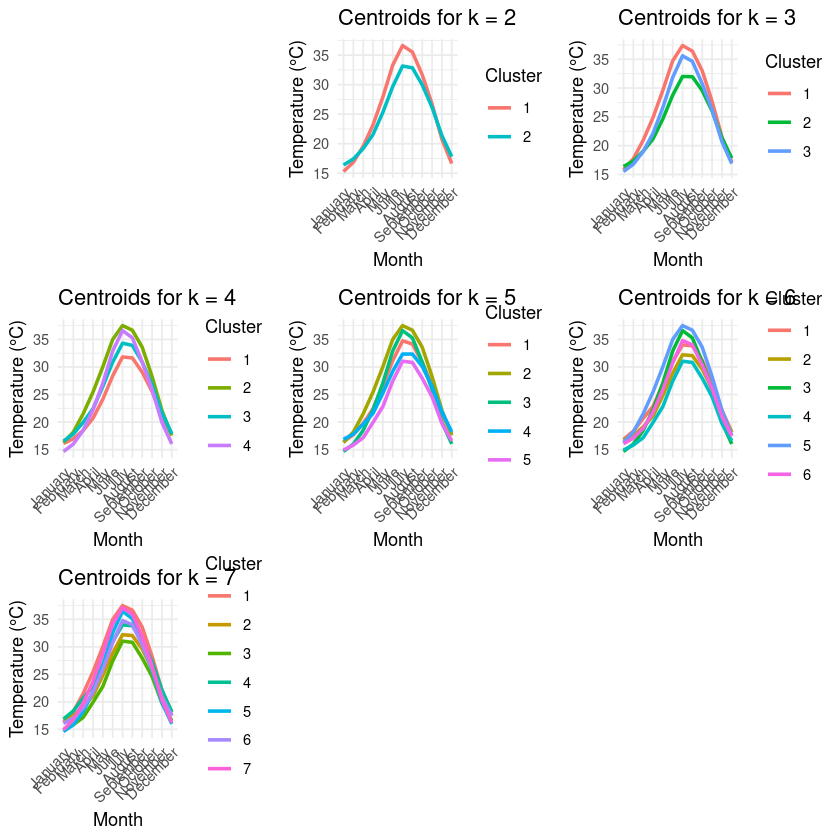

In [106]:

library(cluster)

# Subset data to include only the monthly temperature columns
temperature_data <- data[, c("January", "February", "March", "April", "May",
                             "June", "July", "August", "September", "October",
                             "November", "December")]

# Set up an empty list to store centroids for each k
centroid_plots <- list()

# Perform KMeans clustering and plot centroids for k = 2 to 7
for (k in 2:7) {
  # Perform KMeans clustering
  kmeans_result <- kmeans(temperature_data, centers = k, nstart = 20)
  
  # Extract centroids
  centroids <- as.data.frame(kmeans_result$centers)
  centroids$Cluster <- factor(1:k)
  
  # Reshape centroids for plotting
  centroids_long <- reshape2::melt(centroids, id.vars = "Cluster", variable.name = "Month", value.name = "Temperature")
  centroids_long$Month <- factor(centroids_long$Month, levels = colnames(temperature_data))
  
  # Create the plot
  p <- ggplot(centroids_long, aes(x = Month, y = Temperature, group = Cluster, color = Cluster)) +
    geom_line(size = 1) +
    labs(
      title = paste("Centroids for k =", k),
      x = "Month",
      y = "Temperature (°C)"
    ) +
    theme_minimal() +
    theme(
      axis.text.x = element_text(angle = 45, hjust = 1)  # Rotate x-axis labels for readability
    )
  
  # Add the plot to the list
  centroid_plots[[k]] <- p
}

# Display the plots side by side
library(gridExtra)
do.call(grid.arrange, c(centroid_plots, ncol = 3))


* **Nous pouvons voir que pour k supérieur ou égal à 4, nous obtenons des centroids très proches, ce qui n'est pas bon car nous séparons des clusters naturels et les remplaçons par plusieurs clusters. Le résultat semble assez bon pour k=2 ou k=3, pour en choisir un, cela dépend de l'intention du programmeur. Si nous voulons séparer les villes froides des villes chaudes, la valeur de k=2 fonctionne le mieux.**

In [126]:
# Perform KMeans clustering with 2 clusters
kmeans_result <- kmeans(data[, c("January", "February", "March", "April", "May",
                                 "June", "July", "August", "September", "October",
                                 "November", "December")], centers = 2, nstart = 10)

# Add cluster labels to the data
data$Labels <- kmeans_result$cluster

# Extract cities belonging to each cluster
cluster_0 <- data %>% filter(Labels == 1) %>% pull(City)  # Note: KMeans in R indexes clusters from 1
cluster_1 <- data %>% filter(Labels == 2) %>% pull(City)

# Print cities in each cluster
cat("Cluster 0: ", paste(cluster_0, collapse = ", "), "\n")
cat("Cluster 1: ", paste(cluster_1, collapse = ", "), "\n")

Cluster 0:  beja, gafsa, jendouba, kasserine, skhira, tataouine, tozeur, zaghouan 
Cluster 1:  jabinyanah, khammamet, sfax, sousse, tabarka, tunis, zarzis 


In [50]:
# Créer un dataframe pour les villes tunisiennes et leurs coordonnées
tunisian_cities_coordinates <- data.frame(
  City = c("beja", "gafsa", "jabinyanah", "jendouba", "kasserine", 
           "khammamet", "sfax", "skhira", "sousse", "tabarka", 
           "tataouine", "tozeur", "tunis", "zaghouan", "zarzis"),
  Latitude = c(36.7256, 34.4311, 34.7346, 36.5011, 35.1676, 
               36.4000, 34.7406, 34.2968, 35.8214, 36.9542, 
               33.0000, 33.9197, 36.8190, 36.4020, 33.5032),
  Longitude = c(9.1847, 8.7757, 10.6706, 8.7802, 8.8376, 
                10.6167, 10.7603, 10.0706, 10.6344, 8.7562, 
                10.4667, 8.1335, 10.1658, 10.1427, 11.1122)
)

# Fusionner la latitude et la longitude avec le dataset principal
data <- merge(data, tunisian_cities_coordinates, by = "City")

# Afficher le dataset mis à jour
data

City       April    August   December February January  July     June    
1  beja       21.39506 35.01991 15.29669 14.96719 13.74154 36.20072 32.39300
2  gafsa      23.81893 35.90601 16.21466 16.76072 14.76902 37.08284 34.10288
3  jabinyanah 22.66049 34.04421 18.43688 18.27865 16.90163 34.37276 31.09053
4  jendouba   21.61317 35.16129 15.88610 15.31277 14.34090 36.32019 32.57407
5  kasserine  22.23251 34.72521 15.78256 16.03018 14.28116 36.44763 32.50000
6  khammamet  21.85802 34.37674 17.66229 17.19816 16.17881 35.28076 31.16255
7  sfax       21.49177 31.97332 18.32537 17.72091 16.75030 31.87973 28.90535
8  skhira     23.34979 34.46037 17.73994 18.14961 16.20470 34.84867 31.80041
9  sousse     20.73045 32.09677 17.95102 17.15223 16.42374 32.50299 28.76749
10 tabarka    19.88477 30.75269 16.58702 15.75459 14.78495 31.12903 27.35185
11 tataouine  25.37449 36.04938 17.90323 18.24366 16.57507 36.63282 34.22428
12 tozeur     25.78601 37.25806 17.28395 17.90026 15.63720 38.30546 35.62963
13 tunis      21.57819 33.54640 17.26603 16.65354 15.59339 34.32895 30.32510
14 zaghouan   22.15432 35.30864 16.99522 16.62292 15.33055 36.76424 32.39918
15 zarzis     22.63169 32.98288 18.36718 18.26553 17.00717 32.64835 29.99383
   March    May      November October  September Mean_Temperature Latitude
1  17.25806 25.90800 19.27778 25.65910 30.70688  23.98533         36.7256 
2  19.45042 28.62007 20.06790 26.42573 31.90920  25.42736         34.4311 
3  20.05376 26.61290 21.91564 26.81004 30.86235  25.16999         34.7346 
4  17.73994 26.30824 19.66461 25.99761 30.80638  24.31044         36.5011 
5  18.01673 26.93748 19.07613 24.91836 30.41045  24.27987         35.1676 
6  18.90880 26.18877 20.99588 25.86619 30.54726  24.68535         36.4000 
7  19.16567 25.08761 21.72634 26.27240 29.68698  24.08215         34.7406 
8  20.57547 27.58662 21.77366 27.48108 31.73715  25.47562         34.2968 
9  18.56830 24.50418 21.23868 25.57746 29.52529  23.75322         35.8214 
10 16.98526 22.71008 19.54321 24.41458 27.96642  22.32204         36.9542 
11 20.94783 29.34488 22.16667 28.11031 33.43905  26.58431         33.0000 
12 21.38988 30.43807 21.51646 28.10036 33.85158  26.92474         33.9197 
13 18.30745 25.48586 20.72222 26.01951 30.19693  24.16863         36.8190 
14 18.46476 26.72640 20.44856 25.91398 30.88101  24.83415         36.4020 
15 20.32059 25.99164 22.20165 27.31979 31.10075  24.90259         33.5032 
   Longitude
1   9.1847  
2   8.7757  
3  10.6706  
4   8.7802  
5   8.8376  
6  10.6167  
7  10.7603  
8  10.0706  
9  10.6344  
10  8.7562  
11 10.4667  
12  8.1335  
13 10.1658  
14 10.1427  
15 11.1122

In [114]:
# Remove the unnecessary columns from the data dataframe
data <- data[, !names(data) %in% c("Latitude.x", "Longitude.x", "Latitude.y", "Longitude.y")]

# View the updated dataset
data

City       April    August   December February January  July     June    
1  beja       21.43704 35.10215 15.29669 15.10993 13.93011 36.24552 32.50000
2  gafsa      23.71852 35.92652 16.21466 16.77071 14.89964 37.12545 34.20556
3  jabinyanah 22.69444 34.08602 18.43688 18.39615 17.08602 34.45878 31.14074
4  jendouba   21.65556 35.22222 15.88610 15.44955 14.48029 36.32079 32.64630
5  kasserine  22.17222 34.76165 15.78256 16.02081 14.49642 36.52688 32.65741
6  khammamet  21.88333 34.37993 17.66229 17.35375 16.37097 35.26165 31.14074
7  sfax       21.48333 31.99104 18.32537 17.80330 16.87814 31.92832 28.95185
8  skhira     23.36296 34.51254 17.73994 18.31370 16.39785 34.95341 31.89074
9  sousse     20.71296 32.12545 17.95102 17.28112 16.58602 32.48746 28.79444
10 tabarka    19.93519 30.82258 16.58702 15.82843 14.92652 31.04659 27.44074
11 tataouine  25.18889 36.02867 17.90323 18.35100 16.74194 36.67204 34.28148
12 tozeur     25.72037 37.30108 17.28395 18.02709 15.84588 38.35842 35.72593
13 tunis      21.67593 33.66308 17.26603 16.80408 15.77419 34.31004 30.36667
14 zaghouan   22.19815 35.38172 16.99522 16.73734 15.50896 36.80287 32.48704
15 zarzis     22.52593 32.92294 18.36718 18.35689 17.12724 32.61290 29.88519
   March    May      November October  September Mean_Temperature Labels
1  17.54659 26.15591 19.56579 25.88530 30.68419  24.12160         1     
2  19.79032 28.73297 20.34509 26.53763 31.83072  25.50815         1     
3  20.40860 26.74373 22.09518 26.88889 30.82960  25.27209         2     
4  17.97491 26.53763 19.93743 26.18638 30.79232  24.42412         1     
5  18.38530 27.11828 19.30224 24.93548 30.26286  24.36851         1     
6  19.15233 26.23477 21.13197 25.90502 30.44743  24.74368         2     
7  19.40860 25.12186 21.87713 26.35125 29.66443  24.14872         2     
8  20.94803 27.73477 21.98331 27.55914 31.72073  25.59309         1     
9  18.87634 24.54839 21.40121 25.69534 29.50783  23.83063         2     
10 17.17204 22.82079 19.75920 24.60215 27.94929  22.40754         2     
11 21.32796 29.55197 22.43648 28.26703 33.39485  26.67879         1     
12 21.68100 30.55376 21.79560 28.24194 33.74720  27.02352         1     
13 18.57885 25.57527 20.90064 26.18459 30.24049  24.27832         2     
14 18.80466 26.86559 20.60865 26.02688 30.83893  24.93800         1     
15 20.64875 26.11290 22.40994 27.40143 31.11111  24.95687         2

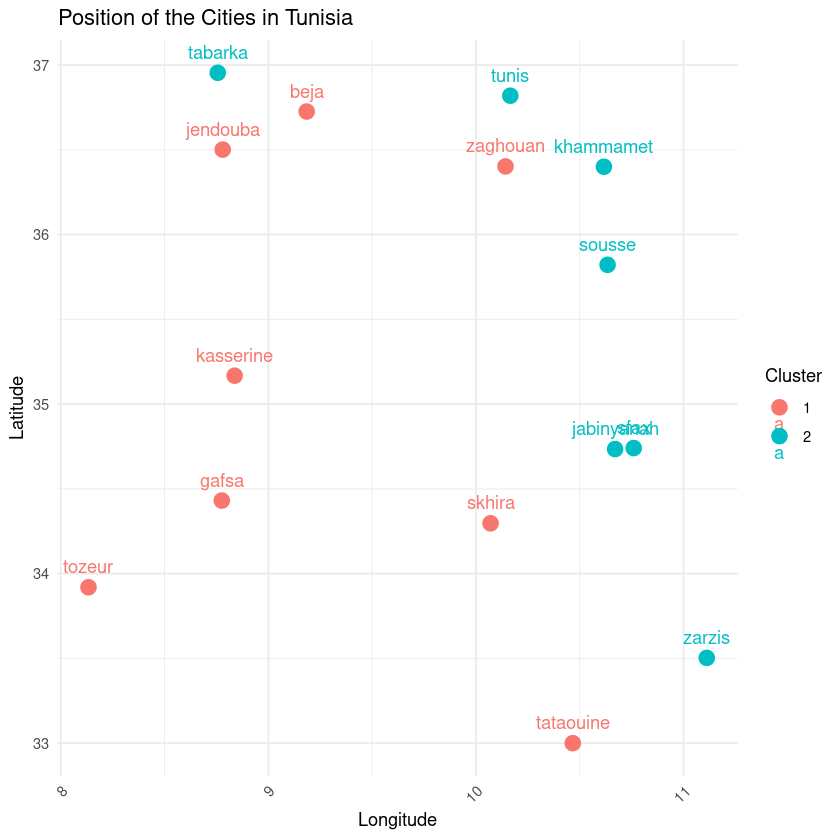

In [118]:
# Créer un graphique de dispersion pour les villes en fonction de leur longitude et latitude
ggplot(data, aes(x = Longitude, y = Latitude, color = factor(Labels))) +
  geom_point(size = 4) +
  geom_text(aes(label = City), vjust = -1, hjust = 0.5) +  # Annoter les villes avec leurs noms
  labs(
    title = "Position des Villes en Tunisie",
    x = "Longitude",
    y = "Latitude",
    color = "Cluster"
  ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Faire pivoter les étiquettes de l'axe x pour une meilleure lisibilité

* **Avec ce graphique de dispersion, nous pouvons clarifier l'intuition que nous avions dans la dernière question. Nous voyons que le regroupement basé sur la température retrouve une similarité géographique entre les villes appartenant au même cluster.**

# Analyse sur la temperature moyenne par année

In [25]:

annual_temps <- big_dataset %>%
  group_by(Year) %>%
  summarise(
    Mean_Day_Temp = mean(Day_temp, na.rm = TRUE),
    Mean_Night_Temp = mean(Night_temp, na.rm = TRUE)
  )
annual_temps

Year Mean_Day_Temp Mean_Night_Temp
1  2015 24.47316      16.99858       
2  2016 24.76422      17.49545       
3  2017 24.29011      16.78316       
4  2018 24.27529      17.22040       
5  2019 24.20142      17.06900       
6  2020 24.72202      17.28658       
7  2021 25.28026      17.75880       
8  2022 25.43016      18.23824       
9  2023 25.43805      17.91111       
10 2024 26.57961      19.24729

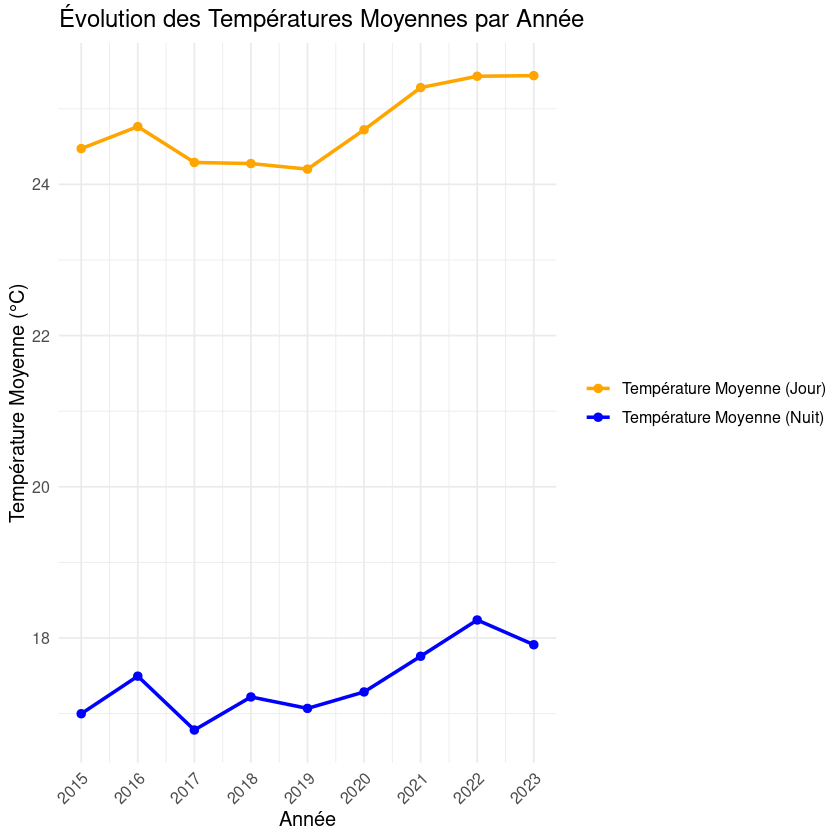

In [35]:
# Remove the year 2024 from the annual_temps dataframe
annual_temps <- annual_temps[annual_temps$Year != 2024, ]

# Plot the updated data
ggplot(annual_temps, aes(x = Year)) +
  geom_line(aes(y = Mean_Day_Temp, color = "Température Moyenne (Jour)"), size = 1) +
  geom_line(aes(y = Mean_Night_Temp, color = "Température Moyenne (Nuit)"), size = 1) +
  geom_point(aes(y = Mean_Day_Temp, color = "Température Moyenne (Jour)"), size = 2) +
  geom_point(aes(y = Mean_Night_Temp, color = "Température Moyenne (Nuit)"), size = 2) +
  labs(
    title = "Évolution des Températures Moyennes par Année",
    x = "Année",
    y = "Température Moyenne (°C)"
  ) +
  scale_color_manual(values = c("orange", "blue")) +
  scale_x_continuous(breaks = annual_temps$Year) +
  theme_minimal() +
  theme(
    text = element_text(size = 12),
    legend.title = element_blank(),
    axis.text.x = element_text(angle = 45, hjust = 1)
  )

# Analyse de l'Évolution des Températures Moyennes par Année

En observant le graphique de l'évolution des températures moyennes par année, nous pouvons remarquer plusieurs tendances intéressantes :

1. **Hausse Générale des Températures** : Il y a une tendance générale à la hausse des températures moyennes, tant pour les températures diurnes que nocturnes. Cela peut indiquer un réchauffement climatique global.

2. **Variabilité Annuelle** : Bien que la tendance générale soit à la hausse, il existe des fluctuations annuelles. Certaines années montrent des augmentations ou des diminutions plus marquées, ce qui peut être dû à des phénomènes climatiques spécifiques ou à des variations naturelles.

3. **Écart entre Températures Diurnes et Nocturnes** : L'écart entre les températures moyennes diurnes et nocturnes semble rester relativement constant au fil des années. Cela pourrait suggérer que les facteurs influençant les températures de jour et de nuit sont proportionnellement similaires.

Ces observations sont cruciales pour comprendre les impacts potentiels du changement climatique sur les différentes régions géographiques représentées dans notre dataset. Une analyse plus approfondie pourrait inclure l'examen des causes spécifiques de ces variations et l'impact sur les écosystèmes locaux.

In [34]:
# Calculer la température moyenne
data1 <- big_dataset %>%
  group_by(Year, Month) %>%          # Grouper par Ville et Mois
  summarize(mean_temp = mean(Day_temp, na.rm = TRUE), .groups = 'drop') %>%
	pivot_wider(names_from = Month, values_from = mean_temp)
data1

Year April    August   December February January  July     June     March   
1  2015 22.56667 33.82915 17.52927 14.43519 15.55556 34.48865 30.47284 17.63082
2  2016 23.74568 32.52091 16.56153 18.80843 17.25448 33.35484 30.64815 19.52449
3  2017 21.93951 35.28076 15.17324 17.42196 13.31302 34.40621 31.90494 19.86022
4  2018 23.03086 31.49462 17.22222 14.97354 17.33094 35.41577 29.90247 20.30227
5  2019 21.51235 34.47312 17.99403 15.33333 14.04779 34.80167 32.73210 18.83751
6  2020 22.39753 35.20311 16.59020 19.04087 15.82676 33.42891 30.62963 18.40024
7  2021 22.12840 36.63441 16.42413 18.83069 16.99403 35.29869 32.70494 18.21266
8  2022 21.51111 34.98447 20.09916 17.28307 14.51613 35.38710 34.77407 17.63202
9  2023 23.10370 33.77658 17.02509 16.74206 15.87336 38.26523 30.16296 21.29152
10 2024 22.30741 34.62127       NA 18.03704 17.32139 35.22700 32.14444 22.11111
   May      November October  September
1  28.26404 20.38889 26.80645 30.94815 
2  26.52927 21.14074 27.57945 29.30494 
3  27.59618 19.58889 24.72162 29.80617 
4  25.04301 20.29136 24.87336 30.74444 
5  23.88292 19.51111 26.23775 30.43333 
6  28.28554 21.86049 25.08363 29.73580 
7  27.30585 20.74568 25.04062 32.64815 
8  28.19235 20.98889 26.81720 32.94709 
9  23.97133 22.88519 29.77180 31.74444 
10 27.86858 23.55233 27.51374 30.50741

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


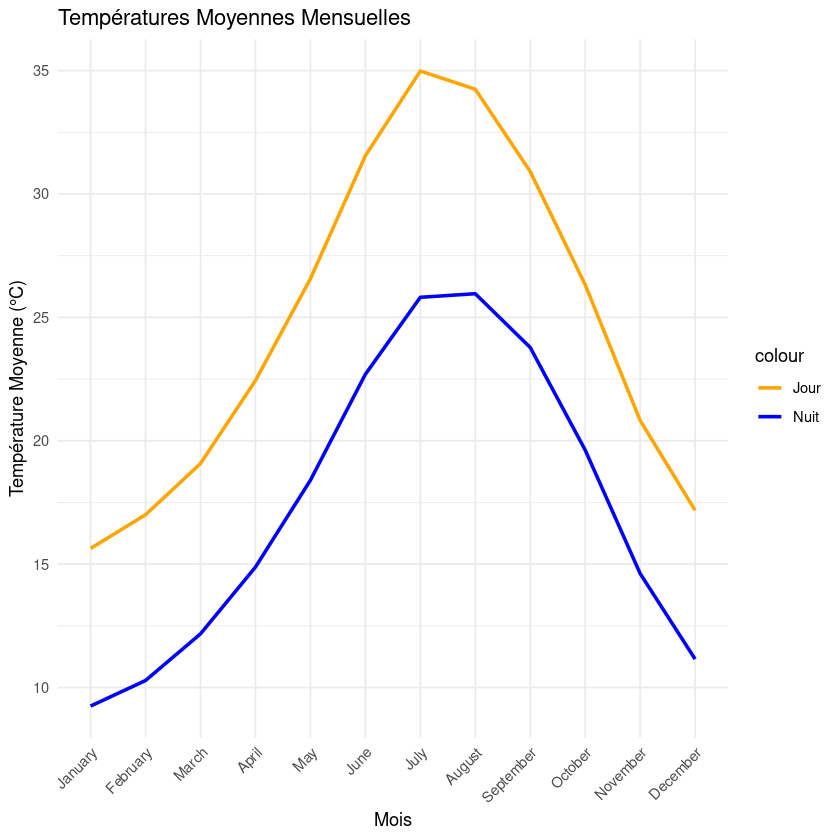

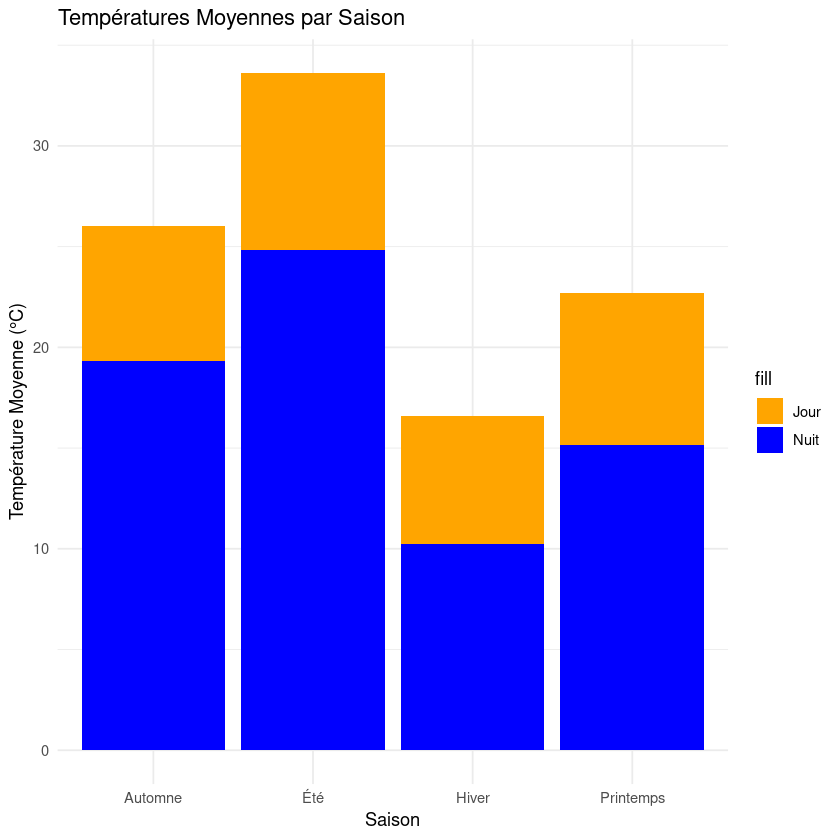

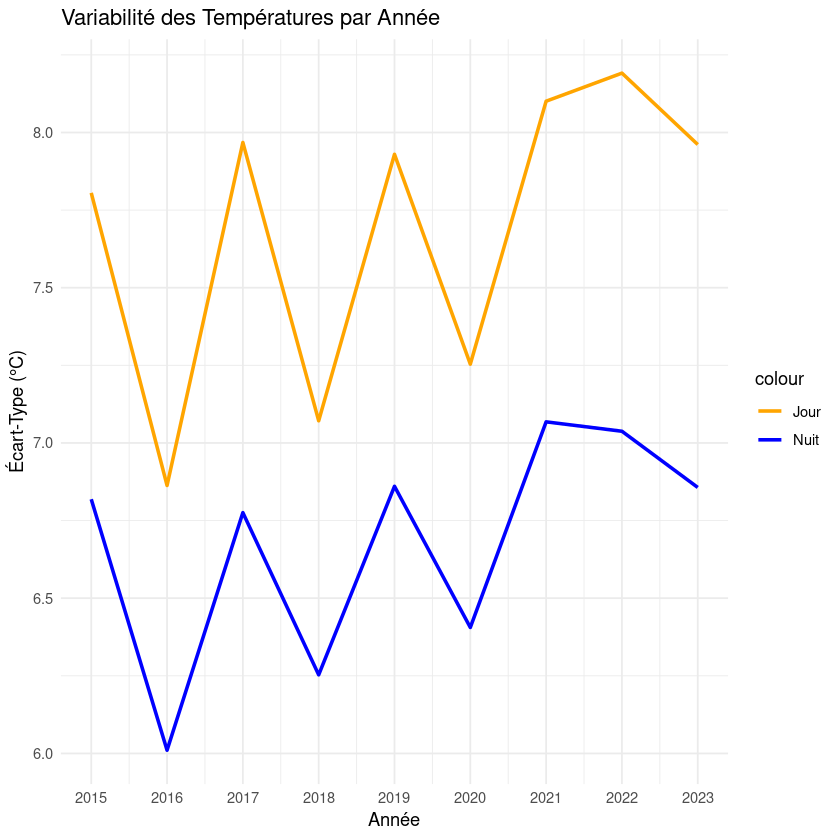

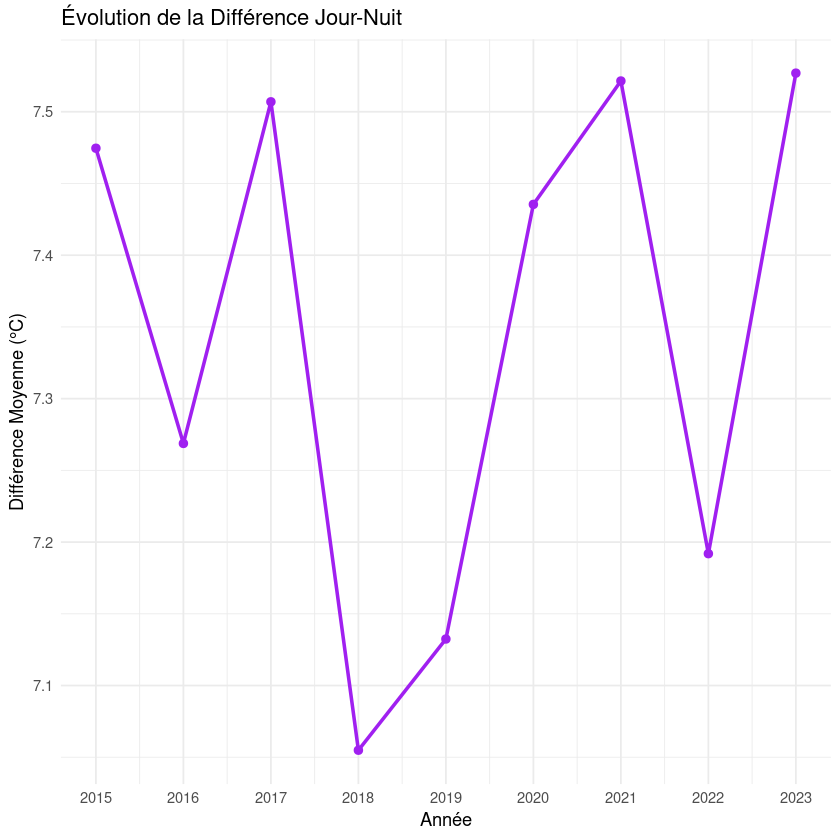

In [16]:

library(dplyr)
library(ggplot2)

# Filtrer les données pour enlever l'année 2024
big_dataset <- big_dataset %>% filter(Year != 2024)

# 1. Variations mensuelles
monthly_avg <- big_dataset %>%
  group_by(Month) %>%
  summarise(
    Mean_Day_Temp = mean(Day_temp, na.rm = TRUE),
    Mean_Night_Temp = mean(Night_temp, na.rm = TRUE)
  )

# Convertir le mois en facteur avec ordre
monthly_avg$Month <- factor(monthly_avg$Month, levels = month.name)

# Graphique mensuel
ggplot(monthly_avg, aes(x = Month)) +
  geom_line(aes(y = Mean_Day_Temp, color = "Jour"), group = 1, size = 1) +
  geom_line(aes(y = Mean_Night_Temp, color = "Nuit"), group = 1, size = 1) +
  labs(
    title = "Températures Moyennes Mensuelles",
    x = "Mois",
    y = "Température Moyenne (°C)"
  ) +
  scale_color_manual(values = c("orange", "blue")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# 2. Tendances saisonnières
big_dataset$Season <- case_when(
  big_dataset$Month %in% c("December", "January", "February") ~ "Hiver",
  big_dataset$Month %in% c("March", "April", "May") ~ "Printemps",
  big_dataset$Month %in% c("June", "July", "August") ~ "Été",
  big_dataset$Month %in% c("September", "October", "November") ~ "Automne"
)

seasonal_avg <- big_dataset %>%
  group_by(Season) %>%
  summarise(
    Mean_Day_Temp = mean(Day_temp, na.rm = TRUE),
    Mean_Night_Temp = mean(Night_temp, na.rm = TRUE)
  )

# Graphique saisonnier
ggplot(seasonal_avg, aes(x = Season)) +
  geom_bar(aes(y = Mean_Day_Temp, fill = "Jour"), stat = "identity", position = "dodge") +
  geom_bar(aes(y = Mean_Night_Temp, fill = "Nuit"), stat = "identity", position = "dodge") +
  labs(
    title = "Températures Moyennes par Saison",
    x = "Saison",
    y = "Température Moyenne (°C)"
  ) +
  scale_fill_manual(values = c("orange", "blue")) +
  theme_minimal()

# 3. Variabilité annuelle
annual_stats <- big_dataset %>%
  group_by(Year) %>%
  summarise(
    Mean_Day_Temp = mean(Day_temp, na.rm = TRUE),
    Mean_Night_Temp = mean(Night_temp, na.rm = TRUE),
    SD_Day_Temp = sd(Day_temp, na.rm = TRUE),
    SD_Night_Temp = sd(Night_temp, na.rm = TRUE)
  )

# Graphique de la variabilité
ggplot(annual_stats, aes(x = Year)) +
  geom_line(aes(y = SD_Day_Temp, color = "Jour"), size = 1) +
  geom_line(aes(y = SD_Night_Temp, color = "Nuit"), size = 1) +
  labs(
    title = "Variabilité des Températures par Année",
    x = "Année",
    y = "Écart-Type (°C)"
  ) +
  scale_color_manual(values = c("orange", "blue")) +
  theme_minimal() +
  scale_x_continuous(breaks = annual_stats$Year)

# 4. Différence entre jour et nuit
big_dataset <- big_dataset %>%
  mutate(Day_Night_Diff = Day_temp - Night_temp)

annual_diff <- big_dataset %>%
  group_by(Year) %>%
  summarise(Mean_Diff = mean(Day_Night_Diff, na.rm = TRUE))

# Graphique de la différence
ggplot(annual_diff, aes(x = Year, y = Mean_Diff)) +
  geom_line(color = "purple", size = 1) +
  geom_point(color = "purple", size = 2) +
  labs(
    title = "Évolution de la Différence Jour-Nuit",
    x = "Année",
    y = "Différence Moyenne (°C)"
  ) +
  theme_minimal() +
  scale_x_continuous(breaks = annual_diff$Year)

### Observations principales :

#### Variabilité diurne (courbe orange) :

- La variabilité des températures diurnes montre des pics importants en 2016, 2018 et 2022. Cela signifie que, pendant ces années, les températures diurnes ont connu des fluctuations plus marquées (ex. : journées exceptionnellement chaudes suivies de journées plus fraîches).
- En revanche, à partir de 2020, on peut observer une tendance à la baisse, ce qui indique une réduction de la variabilité dans les températures diurnes, suggérant des journées plus homogènes.
- La plus grande variabilité diurne se produit en 2022, où l'écart-type atteint environ 8°C, suggérant une année de fortes variations thermiques.

#### Variabilité nocturne (courbe bleue) :

- La variabilité des températures nocturnes est généralement plus stable et se situe entre 6,0°C et 7,5°C sur l'ensemble des années.
- En 2020, 2021 et 2022, la variabilité nocturne semble augmenter légèrement, mais cette tendance est moins marquée que pour les températures diurnes.
- La variabilité nocturne la plus faible se situe dans les années 2017 et 2018.

#### Comparaison entre jour et nuit :

- Les températures diurnes montrent une variabilité beaucoup plus importante que les températures nocturnes. Cela suggère que les journées sont beaucoup plus influencées par des phénomènes climatiques (comme des vagues de chaleur ou des journées plus fraîches), tandis que les nuits restent relativement plus stables.
- L'écart-type élevé des températures diurnes en 2022 pourrait indiquer un changement climatique avec des journées de plus en plus extrêmes, alors que les nuits sont moins affectées.

#### Interprétations supplémentaires :

- **Augmentation de la variabilité** : Si la tendance à une plus grande variabilité des températures diurnes persiste, cela pourrait être dû à des événements climatiques extrêmes, tels que des vagues de chaleur. Ces événements ont été plus fréquents dans le passé récent en raison des effets du changement climatique.
- **Stabilité nocturne** : La stabilité des températures nocturnes pourrait indiquer une régulation thermique naturelle due à la couverture nuageuse, la végétation, ou les masses d'air, qui atténuent les changements thermiques pendant la nuit.

## Conclusion

En analysant les différentes données météorologiques contenues dans nos dataframes, nous pouvons tirer plusieurs conclusions intéressantes :

1. **Températures Moyennes** :
   - Les statistiques des températures de jour et de nuit, représentées dans les dataframes `day_temp_stats` et `night_temp_stats`, montrent des variations significatives entre les mois. Cela peut indiquer des saisons bien définies avec des écarts de température marqués.

2. **Précipitations** :
   - Le dataframe `rainfall_counts` nous donne une idée de la fréquence des jours de pluie par année. En analysant ces données, nous pouvons identifier des tendances annuelles et saisonnières des précipitations.

3. **Conditions Météorologiques** :
   - Le dataframe `weather_counts` nous permet de voir la répartition des différentes conditions météorologiques (ensoleillé, nuageux, pluvieux, etc.). Cela peut nous aider à comprendre les conditions climatiques prédominantes dans les différentes villes étudiées.

4. **Températures par Ville et Mois** :
   - Le dataframe `data` nous offre une vue d'ensemble des températures moyennes mensuelles pour chaque ville. Cela peut être utile pour comparer les climats des différentes villes et identifier les mois les plus chauds et les plus froids.

5. **Données Filtrées** :
   - Le dataframe `big_dataset_filtered` nous permet de travailler avec un sous-ensemble de données plus pertinent pour des analyses spécifiques, en filtrant les informations non nécessaires.

En résumé, ces analyses nous fournissent une compréhension approfondie des tendances climatiques et météorologiques dans les différentes villes et périodes de l'année. Ces informations peuvent être cruciales pour des études environnementales, des prévisions météorologiques, ou même pour planifier des activités en fonction des conditions climatiques attendues.